<h1><b>PDAS CA2: Predicting Unemployement Rate based on Interest Rate, Public Spending on Education as a share of GDP and other Factors </b></h1>
<hr></hr>
<h5>Name : Shaun Kwo Rui Yu
</br>Class : DAAA/FT/1B/06
</br>Admin No.:2317933 </h5>

<hr></hr>
<h5><b>The objectives of this project are to:</b></h5>

<ol>

<li> <b>Identify and Handle Missing Values:</b>
   <p>Assess and address any missing values in the dataset related to the factors influencing unemployment rates, ensuring the completeness and reliability of the data for analysis.</p></li>

<li> <b>Identify and Handle Outliers:</b>
   <p>Detect and manage outliers in the dataset to enhance the accuracy of regression analysis, ensuring that extreme values do not unduly influence the model's predictions.</p></li>

<li> <b>Apply Regression Analysis using Statsmodels:</b>
   <p>Utilize the Statsmodels library to perform regression analysis, exploring the relationships between unemployment rates and various factors, with a focus on Interest Rate and Public Spending on Education as a share of GDP.</p></li>

<li> <b>Plot at Least Four Charts to Explain Observations:</b>
   <p>Generate informative charts using visualization packages such as Matplotlib, Seaborn, Pandas, and Statsmodels to illustrate key insights derived from the regression analysis.</p>
   <ul>
      <li>Plot regression lines to visualize the impact of Interest Rate and Public Spending on Education on unemployment rates.</li>
      <li>Create scatter plots to depict the relationships between variables.</li>
      <li>Generate residual plots to assess the model's fit and identify patterns.</li>
      <li>Employ boxplots or other relevant charts to highlight the distribution of key variables.</li>
   </ul>
</li>

</ol>
<h2>Reminder: Restart and run all every time to refresh as Year in the Model part can only be ran once or result will be wrong</h2>

<hr></hr>
<h3>Importing Libraries</h3>
<hr></hr>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import qqplot

<hr></hr>
<h3>Loading Dataset</h3>
<hr></hr>

In [2]:
# Graduate Employment Survey NTU NUS SIT SMU SUSS SUTD dataset
sg_unigrad=pd.read_csv('./datasets/GraduateEmploymentSurveyNTUNUSSITSMUSUSSSUTD.csv')
# print (sg_unigrad)

# Consumption of CO2 per Capita and GDP per Capita dataset
c02Ngdp=pd.read_csv('./datasets/consumption-co2-per-capita-vs-gdppc.csv')
print(c02Ngdp)

# Interest Rate dataset
Rint_rate=pd.read_excel('./datasets/statistic_id1342636_monthly-real-vs-nominal-interest-rates-and-inflation-rate-for-the-us-1982-2023.xlsx')
# print(Rint_rate)

# Unemployment Rate dataset
unemployment_rate=pd.read_csv('./datasets/unemployment-rate-imf.csv')
# print(unemployment_rate)

# Public Spending on Education as a share of GDP
spending_on_edu=pd.read_csv('./datasets/total-government-expenditure-on-education-gdp.csv')
# print(spending_on_edu)

# ratio-of-female-to-male-labor-force-participation-rates-ilo-wdi
ratio_female_to_male_labor=pd.read_csv('./datasets/ratio-of-female-to-male-labor-force-participation-rates-ilo-wdi.csv')
print(ratio_female_to_male_labor)

            Entity      Code  Year  \
0         Abkhazia  OWID_ABK  2015   
1      Afghanistan       AFG  2002   
2      Afghanistan       AFG  2003   
3      Afghanistan       AFG  2004   
4      Afghanistan       AFG  2005   
...            ...       ...   ...   
58712     Zimbabwe       ZWE  1985   
58713     Zimbabwe       ZWE  1986   
58714     Zimbabwe       ZWE  1987   
58715     Zimbabwe       ZWE  1988   
58716     Zimbabwe       ZWE  1989   

       Per capita consumption-based CO2 emissions  \
0                                             NaN   
1                                             NaN   
2                                             NaN   
3                                             NaN   
4                                             NaN   
...                                           ...   
58712                                         NaN   
58713                                         NaN   
58714                                         NaN   
58715        

<h4><b>URLS of all the datasets:</b></h4>
<hr></hr>
<ol>

<li>
GraduateEmploymentSurveyNTUNUSSITSMUSUSSSUTD (gov.sg data): 

https://beta.data.gov.sg/collections/415/datasets/d_3c55210de27fcccda2ed0c63fdd2b352/view
</li>

<li>
unemployment-rate-imf:

https://ourworldindata.org/grapher/unemployment-rate-imf
</li>

<li>
consumption-co2-per-capital-vs-gdppc: 

https://ourworldindata.org/grapher/consumption-co2-per-capita-vs-gdppc</li>


<li>
monthly-real-vs-nominal-interest-rates-and-inflation-rate-for-the-us-1982-2023: 

https://www-statista-com.sp.remotexs.co/statistics/1342636/real-nominal-interest-rate-us-inflation/
</li>

<li>
Public spending on education as a share of GDP:

https://ourworldindata.org/grapher/total-government-expenditure-on-education-gdp
</li>

<li>Ratio of female to male labor force participation rates: 

https://ourworldindata.org/grapher/ratio-of-female-to-male-labor-force-participation-rates-ilo-wdi?time=2021
</ol>

<hr></hr>
<h3>Data Imputation for Uni Grad Dataset</h3>
<hr></hr>

<h4><b>Understanding Each Dataset in Detail</h4></b>

<u><h4>GraduateEmploymentSurveyNTUNUSSITSMUSUSSSUTD</u></h4>

In [3]:
# Checking row for missing values but 
# Note that since they filled missing in the dataset with na, so find by na  

print(f"The number of missing value for each column is \n{sg_unigrad.isin(['na']).sum()}")

# Checking for Duplicated values
print(f"\nThe number of rows with duplicated data is {sg_unigrad.duplicated().sum()}")

# Checking for rows with more than one missing value
indices_more_than_one_null = sg_unigrad[sg_unigrad.isin(['na']).sum(axis=1) > 1].index
print(f"\nThe rows with 2 or more data missing are {indices_more_than_one_null.tolist()}")



The number of missing value for each column is 
year                          0
university                    0
school                       28
degree                        0
employment_rate_overall      89
employment_rate_ft_perm      89
basic_monthly_mean           89
basic_monthly_median         89
gross_monthly_mean           89
gross_monthly_median         89
gross_mthly_25_percentile    89
gross_mthly_75_percentile    89
dtype: int64

The number of rows with duplicated data is 0

The rows with 2 or more data missing are [24, 28, 42, 43, 49, 67, 68, 72, 109, 127, 128, 151, 152, 156, 199, 201, 203, 209, 211, 214, 241, 242, 266, 270, 288, 289, 291, 308, 322, 324, 334, 336, 345, 371, 375, 381, 383, 406, 425, 437, 443, 446, 448, 451, 455, 458, 460, 468, 495, 499, 505, 506, 508, 509, 552, 555, 569, 575, 577, 579, 582, 586, 603, 613, 622, 630, 636, 637, 639, 640, 643, 647, 675, 712, 714, 716, 718, 723, 727, 729, 768, 775, 776, 809, 810, 811, 814, 817, 1056]


In [4]:
# Drop faculty name which is 'school' in this case
sg_unigrad=sg_unigrad.drop(['school'], axis=1)

# Make an excel file to look at missing data clearer
sg_unigrad[sg_unigrad.isin(['na']).sum(axis=1) > 1].to_excel('datasets/check_sg_unigrad.xlsx', engine='openpyxl')

# Dropping the 89 rows with a lot of missing data
sg_unigrad=sg_unigrad.drop(indices_more_than_one_null)

<h5>Thought Process</h5>
<hr></hr>
<ul>
<li>
<b>Degree and university</b> are the <b>important factors</b> that mostly decides the salary of a university graduate, 

and <b>school is just a faculty name like SOC</b> which is <b>not important</b>, 

so <b>dropping column 'school'</b> would <b>not affect the analysis</b> much.
</li>
<li>
The above shows that there are <b>89 rows with practically no data</b> and

since<b> 89 rows with a lot of missing data in important columns for data analysis</b>,

 imputation may lead to <b>inaccurate results and compromised analysis validity, hence the whole 89 rows would be dropped</b>


<h4>Making dataset more tidy</h4>
<hr></hr>

In [5]:
# Grouping by the 'university' column
sg_unigrad_university = sg_unigrad.groupby('university')
uni_df = []

for university, group_df in sg_unigrad_university:
    print(university)
    print(group_df)
    uni_df.append(group_df)

unigrad = pd.concat(uni_df)

# Save the result DataFrame to an Excel file
unigrad.to_excel('./datasets/check_groupby_uni_unigrad.xlsx', engine='openpyxl')

Nanyang Technological University
      year                        university  \
0     2013  Nanyang Technological University   
1     2013  Nanyang Technological University   
2     2013  Nanyang Technological University   
3     2013  Nanyang Technological University   
4     2013  Nanyang Technological University   
...    ...                               ...   
1020  2021  Nanyang Technological University   
1021  2021  Nanyang Technological University   
1022  2021  Nanyang Technological University   
1023  2021  Nanyang Technological University   
1024  2021  Nanyang Technological University   

                                           degree employment_rate_overall  \
0                        Accountancy and Business                    97.4   
1     Accountancy (3-yr direct Honours Programme)                    97.1   
2        Business (3-yr direct Honours Programme)                    90.9   
3                          Business and Computing                    87.5   
4    

      year                        university  \
34    2013  National University of Singapore   
35    2013  National University of Singapore   
36    2013  National University of Singapore   
37    2013  National University of Singapore   
38    2013  National University of Singapore   
...    ...                               ...   
1059  2021  National University of Singapore   
1060  2021  National University of Singapore   
1061  2021  National University of Singapore   
1062  2021  National University of Singapore   
1063  2021  National University of Singapore   

                                              degree employment_rate_overall  \
34                                  Bachelor of Arts                    84.8   
35                           Bachelor of Arts (Hons)                    86.6   
36                       Bachelor of Social Sciences                    88.1   
37               Bachelor of Business Administration                    88.7   
38        Bachelor of B

In [6]:
c02Ngdp = c02Ngdp[(c02Ngdp['Entity'] == 'Singapore') & (c02Ngdp['Year'] >= 1990) & (c02Ngdp['Year'] <= 2020)]

unemployment_rate = unemployment_rate[(unemployment_rate['Entity'] == 'Singapore') 
                                      & (unemployment_rate['Year'] >= 1990) & (unemployment_rate['Year'] <= 2020)]

spending_on_edu = spending_on_edu[(spending_on_edu['Entity'] == 'Singapore') 
                                    & (spending_on_edu['Year'] >= 1990) & (spending_on_edu['Year'] <= 2020)]

ratio_female_to_male_labor = ratio_female_to_male_labor[(ratio_female_to_male_labor['Entity'] == 'Singapore') 
                                    & (ratio_female_to_male_labor['Year'] >= 1990) & (ratio_female_to_male_labor['Year'] <= 2020)]

In [7]:
# Renaming columns
Rint_rate=Rint_rate.rename(columns={'Monthly 10-year real interest rate, Federal Funds effective rate and inflation rate in the United States from 1982 to 2023':'Date',
                                    'Real interest rate':'Real interest rate (in %)',
                                    'Federal funds effective rate':'Federal funds effective rate (in %)',
                                    'Inflation rate':'Inflation rate (in %)'})

# Remove the in % column
Rint_rate=Rint_rate.drop(columns=Rint_rate.columns[4])

# Making date into datetime format for easier computation
Rint_rate['Date'] = pd.to_datetime(Rint_rate['Date'])

# Extract the year from the 'Date' column
Rint_rate['Year'] = Rint_rate['Date'].dt.year

# Groupby year and calculate the mean real interest rate for each year
mean_interest_rate_by_year = Rint_rate.groupby('Year')['Real interest rate (in %)'].mean().reset_index()

# Rename the columns 
mean_interest_rate_by_year.columns = ['Year', 'Mean Real Interest Rate']
mean_interest_rate_by_year=mean_interest_rate_by_year[(mean_interest_rate_by_year['Year'] >= 1990) & (mean_interest_rate_by_year['Year'] <= 2020)]

# Display or use the resulting DataFrame
print(mean_interest_rate_by_year)

# Column Unemployment rate - Percent of total labor force - Forecasts is totally empty so drop
unemployment_rate=unemployment_rate.drop(columns=['Entity','Code','Unemployment rate - Percent of total labor force - Forecasts'])

# As Singapore is in Asia, so fill the empty 'continent' column with 'Asia'
c02Ngdp['Continent']=c02Ngdp['Continent'].fillna('Asia')


    Year  Mean Real Interest Rate
8   1990                 4.320833
9   1991                 3.935000
10  1992                 3.382500
11  1993                 2.712500
12  1994                 3.535000
13  1995                 3.308333
14  1996                 3.140833
15  1997                 3.199167
16  1998                 2.626667
17  1999                 2.887500
18  2000                 3.116667
19  2001                 2.237500
20  2002                 2.033333
21  2003                 1.445833
22  2004                 1.700833
23  2005                 1.890833
24  2006                 2.283333
25  2007                 2.040000
26  2008                 1.303333
27  2009                 1.047500
28  2010                 0.870833
29  2011                 0.524167
30  2012                -0.013333
31  2013                 0.288333
32  2014                 0.610833
33  2015                 0.589167
34  2016                 0.421667
35  2017                 0.727500
36  2018      

<h3>Merging all the other datasets together for Singapore from 2000 to 2020</h3>
<hr></hr>

In [8]:
# Merge DataFrames using 'Year' as the key
merged_df = mean_interest_rate_by_year.merge(c02Ngdp, on='Year', how='inner')
merged_df = merged_df.merge(unemployment_rate, on='Year', how='inner')

# Drop Entity and Code or there would be repeat in the spending_on_edu dataset
merged_df=merged_df.drop(columns=['Code', 'Entity'])
merged_df = merged_df.merge(spending_on_edu, on='Year', how='inner')

# Drop Entity and Code or there would be repeat in the ratio_female_to_male_labor dataset
merged_df=merged_df.drop(columns=['Code', 'Entity'])
merged_df = merged_df.merge(ratio_female_to_male_labor, on='Year', how='inner')

# Entity and Code have the same meaning, so can drop "Code"
merged_df=merged_df.drop(columns=['Code'])
saved_merged_df=merged_df.copy()

# Save to Excel
merged_df.to_excel('datasets/merged_df.xlsx', engine='openpyxl')


In [9]:
# Shortening Column names
merged_df = merged_df.rename(columns={
    'Mean Real Interest Rate': 'Interest Rate',
    'Entity': 'Country',
    'Per capita consumption-based CO2 emissions': 'CO2 Emissions per Capita',
    'GDP per capita, PPP (constant 2017 international $)': 'GDP per Capita',
    'Population (historical estimates)': 'Population',
    'Continent': 'Continent',
    'Unemployment rate - Percent of total labor force - Observations': 'Unemployment Rate',
    'Historical and more recent expenditure estimates': 'Education Spending Share of GDP',
    'Ratio of female to male labor force participation rate (%) (modeled ILO estimate)':'Ratio of female to male labor force participation'
})

merged_df.head(30)

,Year,Interest Rate,CO2 Emissions per Capita,GDP per Capita,Population,Continent,Unemployment Rate,Education Spending Share of GDP,Country,Ratio of female to male labor force participation
0,2000,3.116667,31.327715,55904.234,4053602.0,Asia,2.675,3.321300,Singapore,65.878944
1,2001,2.237500,26.756609,53833.727,4121341.0,Asia,2.650,3.542490,Singapore,66.561280
2,2002,2.033333,26.616610,55437.560,4176799.0,Asia,3.550,3.878530,Singapore,65.750320
3,2003,1.445833,24.346886,58819.957,4226417.0,Asia,3.950,3.981940,Singapore,67.153366
4,2004,1.700833,28.183523,63862.125,4270407.0,Asia,3.350,3.652760,Singapore,68.193190
5,2005,1.890833,29.796038,66973.550,4344645.0,Asia,3.125,3.195960,Singapore,68.588920
6,2006,2.283333,31.480589,70756.445,4486581.0,Asia,2.650,2.859120,Singapore,68.983430
7,2007,2.040000,28.139220,73992.125,4663262.0,Asia,2.125,2.946750,Singapore,69.379845
8,2008,1.303333,39.013966,71464.930,4838404.0,Asia,2.225,2.764600,Singapore,72.886960
9,2009,1.047500,20.893599,69430.484,5010707.0,Asia,3.025,3.010130,Singapore,72.205370


<h2><i>You are the head of the Data Analysis in Ministry of Manpower (MOM) of Singapore. The Ministry has asked you and your team to predict unemployment rates based on a few given factors so that the Ministry can take action in futureto prevent high unemployment rates from happening in Singapore. 

You have been entasked to create a prediction model to aid MOM in its decision making in trying to keep unemployment rates low</i></h2>

<hr></hr>
<h3>Exploratory Data Analysis(EDA)</h3>
<hr></hr>

In [10]:
# Display basic statistics about the dataset
unigrad.shape
unigrad.info()
unigrad.head()

# Explore statistical properties of the time series data
unigrad.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1032 entries, 0 to 1120
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   year                       1032 non-null   int64 
 1   university                 1032 non-null   object
 2   degree                     1032 non-null   object
 3   employment_rate_overall    1032 non-null   object
 4   employment_rate_ft_perm    1032 non-null   object
 5   basic_monthly_mean         1032 non-null   object
 6   basic_monthly_median       1032 non-null   object
 7   gross_monthly_mean         1032 non-null   object
 8   gross_monthly_median       1032 non-null   object
 9   gross_mthly_25_percentile  1032 non-null   object
 10  gross_mthly_75_percentile  1032 non-null   object
dtypes: int64(1), object(10)
memory usage: 96.8+ KB


,year
count,1032.000000
mean,2017.368217
std,2.526307
min,2013.000000
25%,2015.000000
50%,2018.000000
75%,2020.000000
max,2021.000000


The Singapore University Graduate Survey Dataset has 1120 rows of clean data and 11 columns


<b>Columns in the dataset are:</b>
<ul>
    <li><b>Year:</b> Year that they graduated</li>
    <li><b>University:</b> University they attended</li>
    <li><b>Degree:</b> Degree that they studied</li>
    <li><b>Employment Rate of Degree:</b> Chance that a degree holder gets employed</li>
    <li><b>Permanent Full-Time Employment Rate:</b> Chance that a degree holder gets employed full-time permanently</li>
    <li><b>Mean Basic Monthly Salary:</b> Mean monthly salary at the entry level of employment</li>
    <li><b>Median Basic Monthly Salary:</b> Median monthly salary at the entry level of employment</li>
    <li><b>Gross Mean Monthly Salary:</b> Mean total monthly salary including bonuses and additional compensation</li>
    <li><b>Gross Median Monthly Salary:</b> Median total monthly salary including bonuses and additional compensation</li>
    <li><b>Gross 25th Percentile Monthly Salary:</b> Total monthly salary at the 25th percentile of income distribution</li>
    <li><b>Gross 75th Percentile Monthly Salary:</b> Total monthly salary at the 75th percentile of income distribution</li>
</ul>

In [11]:
# Set Year as index
merged_df=merged_df.set_index('Year')

# Drop continent as Singapore is in Asia
merged_df=merged_df.drop(columns=['Continent'])

# Display basic statistics about the dataset
merged_df.shape
merged_df.info()
merged_df.head()

# Explore statistical properties of the time series data
merged_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 2000 to 2020
Data columns (total 8 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Interest Rate                                      21 non-null     float64
 1   CO2 Emissions per Capita                           21 non-null     float64
 2   GDP per Capita                                     21 non-null     float64
 3   Population                                         21 non-null     float64
 4   Unemployment Rate                                  21 non-null     float64
 5   Education Spending Share of GDP                    21 non-null     float64
 6   Country                                            21 non-null     object 
 7   Ratio of female to male labor force participation  21 non-null     float64
dtypes: float64(7), object(1)
memory usage: 1.4+ KB


,Interest Rate,CO2 Emissions per Capita,GDP per Capita,Population,Unemployment Rate,Education Spending Share of GDP,Ratio of female to male labor force participation
count,21.000000,21.000000,21.000000,2.100000e+01,21.000000,21.000000,21.000000
mean,1.175794,30.349369,77257.831857,5.037331e+06,2.515476,3.089610,73.190448
std,0.858302,7.154592,14695.547923,6.648492e+05,0.603970,0.376295,4.999753
min,-0.118333,20.893599,53833.727000,4.053602e+06,1.900000,2.687450,65.750320
25%,0.535000,26.616610,66973.550000,4.344645e+06,2.075000,2.856470,68.588920
50%,1.047500,28.139220,78115.210000,5.163585e+06,2.225000,2.946750,73.846150
75%,1.890833,31.480589,89160.730000,5.650020e+06,3.000000,3.195960,77.655580
max,3.116667,47.334576,98336.950000,5.909874e+06,3.950000,3.981940,79.329320


The merged dataset contains 21 rows of data with 8 columns, exluding Year.

The main focus will be to find out how the dependant variable <b>Unemployment Rate</b> will be affected by independent variables such as Interest Rate, C02 Emissions per Capita and so on...

<b>Columns in the dataset are:</b>
<ul>
    <li><b>Interest Rate:</b> Cost of borrowing money</li>
    <li><b>CO2 Emissions per Capita:</b> Amount of carbon dioxide emitted per person in a specific area</li>
    <li><b>GDP per Capita:</b> Gross Domestic Product (GDP) divided by the population of a region, representing the average economic output per person</li>
    <li><b>Population:</b> Total number of people living in a specific area</li>
    <li><b>Unemployment Rate:</b> Percentage of the workforce that is unemployed and actively seeking employment</li>
    <li><b>Education Spending Share of GDP:</b> Proportion of Gross Domestic Product (GDP) dedicated to funding education initiatives and programs</li>
    <li><b>Ratio of female to male labor force participation:</b> Proportion of females participating in the labor force relative to males.</li>
</ul>


In [12]:
# Checking for any missing values
print(f"The number of missing value for each column is \n{merged_df.isnull().sum()}")

# Checking for Duplicated values
print(f"\nThe number of rows with duplicated data is {merged_df.duplicated().sum()}")

# Checking for rows with more than one missing value
indices_more_than_one_null = merged_df[merged_df.isin(['na']).sum(axis=1) > 1].index
print(f"\nThe rows with 2 or more data missing are {indices_more_than_one_null.tolist()}")

The number of missing value for each column is 
Interest Rate                                        0
CO2 Emissions per Capita                             0
GDP per Capita                                       0
Population                                           0
Unemployment Rate                                    0
Education Spending Share of GDP                      0
Country                                              0
Ratio of female to male labor force participation    0
dtype: int64

The number of rows with duplicated data is 0

The rows with 2 or more data missing are []


<h4>Univariate Analysis</h4>
<hr></hr>
Analysing distribution of each variable

In [13]:
plot_data=unigrad.copy()

# List of columns to convert to numeric
plot_data['employment_rate_ft_perm']=pd.to_numeric(plot_data['employment_rate_ft_perm'])
plot_data['gross_monthly_median']=pd.to_numeric(plot_data['gross_monthly_median'])
plot_data['gross_mthly_25_percentile']=pd.to_numeric(plot_data['gross_mthly_25_percentile'])
plot_data['gross_mthly_75_percentile']=pd.to_numeric(plot_data['gross_mthly_75_percentile'])

plot_data['employment_rate_ft_perm']=plot_data['employment_rate_ft_perm'].round(0)

# Columns to be rounded to multiples of 100
round_100_list = ['gross_monthly_median', 'gross_mthly_25_percentile', 'gross_mthly_75_percentile']

# Round columns to multiples of 100
plot_data[round_100_list] = plot_data[round_100_list].round(-2)

In [14]:
NUS=plot_data[plot_data['university']=='National University of Singapore']
SMU=plot_data[plot_data['university']=='Singapore Management University']
NTU=plot_data[plot_data['university']=='Nanyang Technological University']
SIT=plot_data[plot_data['university']=='Singapore Institute of Technology']
SUSS=plot_data[plot_data['university']=='Singapore University of Social Sciences']
SUTD=plot_data[plot_data['university']=='Singapore University of Technology and Design']

<h4>Histogram to Visualise Distribution of Different Variables in Different Universities</h4>
<hr></hr>

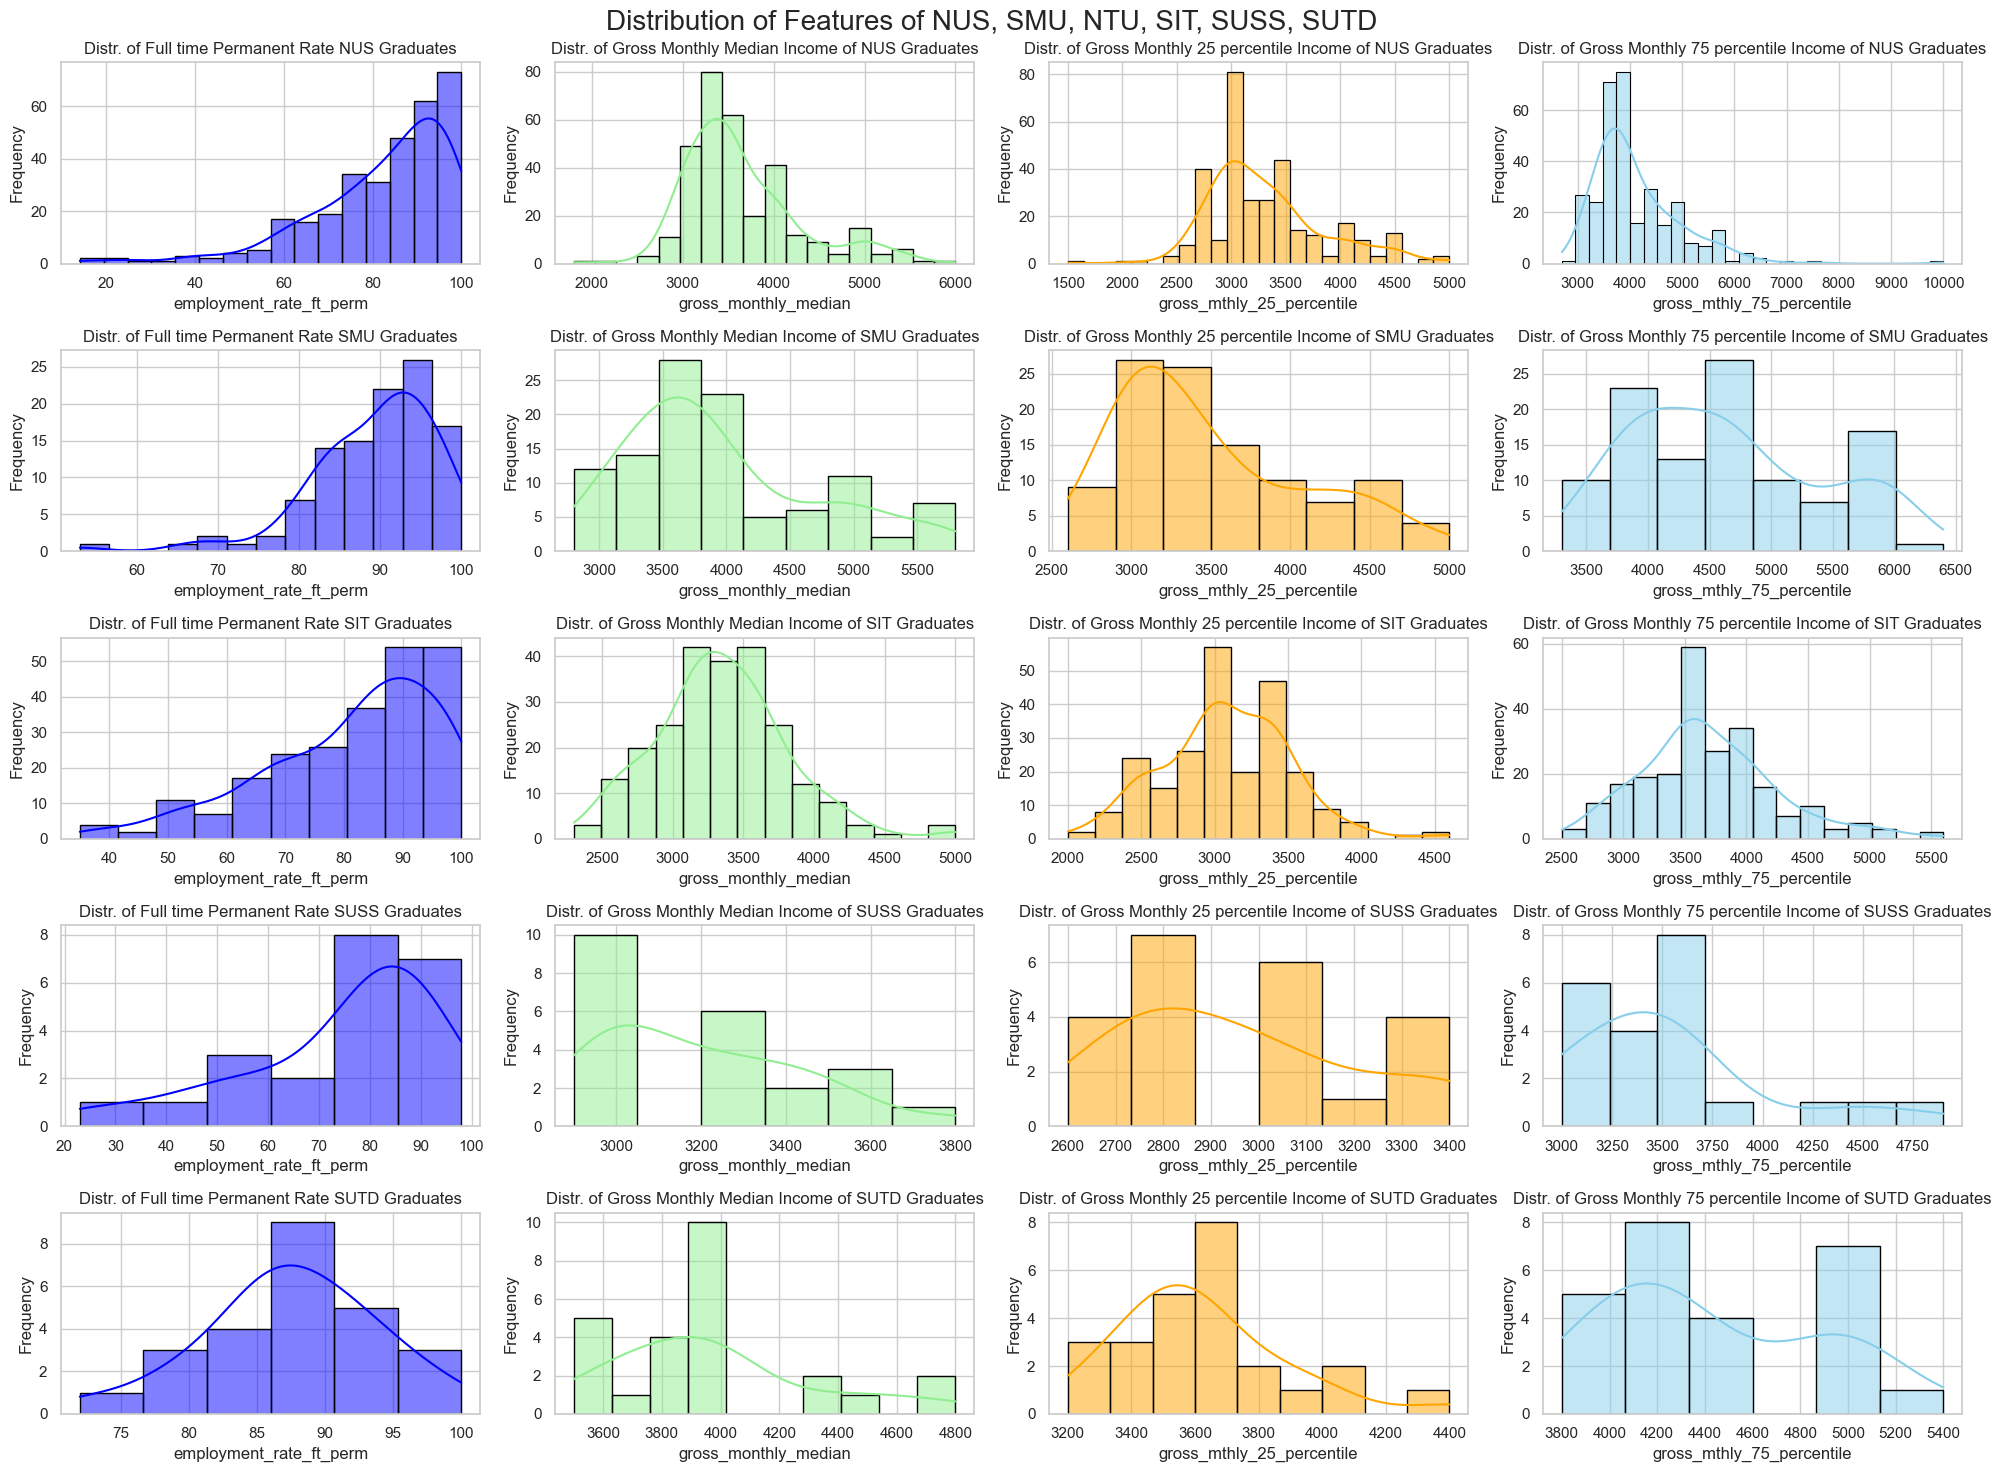

In [15]:
sns.set(style="whitegrid")
plt.figure(figsize=(20,15))
plt.suptitle('Distribution of Features of NUS, SMU, NTU, SIT, SUSS, SUTD', fontsize=20)

# Plot histogram 
plt.subplot(5, 4, 1)
sns.histplot(NUS['employment_rate_ft_perm'], color='blue', edgecolor='black', kde=True)
plt.title('Distr. of Full time Permanent Rate NUS Graduates')
plt.ylabel('Frequency')


plt.subplot(5, 4, 2)
sns.histplot(NUS['gross_monthly_median'], color='lightgreen', edgecolor='black', kde=True)
plt.title('Distr. of Gross Monthly Median Income of NUS Graduates')
plt.ylabel('Frequency')


plt.subplot(5, 4, 3)
sns.histplot(NUS['gross_mthly_25_percentile'], color='orange', edgecolor='black', kde=True)
plt.title('Distr. of Gross Monthly 25 percentile Income of NUS Graduates')
plt.ylabel('Frequency')


plt.subplot(5, 4, 4)
sns.histplot(NUS['gross_mthly_75_percentile'], color='skyblue', edgecolor='black', kde=True)
plt.title('Distr. of Gross Monthly 75 percentile Income of NUS Graduates')
plt.ylabel('Frequency')


plt.subplot(5, 4, 5)
sns.histplot(SMU['employment_rate_ft_perm'], color='blue', edgecolor='black', kde=True)
plt.title('Distr. of Full time Permanent Rate SMU Graduates')
plt.ylabel('Frequency')


plt.subplot(5, 4, 6)
sns.histplot(SMU['gross_monthly_median'], color='lightgreen', edgecolor='black', kde=True)
plt.title('Distr. of Gross Monthly Median Income of SMU Graduates')
plt.ylabel('Frequency')


plt.subplot(5, 4, 7)
sns.histplot(SMU['gross_mthly_25_percentile'], color='orange', edgecolor='black', kde=True)
plt.title('Distr. of Gross Monthly 25 percentile Income of SMU Graduates')
plt.ylabel('Frequency')


plt.subplot(5, 4, 8)
sns.histplot(SMU['gross_mthly_75_percentile'], color='skyblue', edgecolor='black', kde=True)
plt.title('Distr. of Gross Monthly 75 percentile Income of SMU Graduates')
plt.ylabel('Frequency')

plt.subplot(5, 4, 9)
sns.histplot(SIT['employment_rate_ft_perm'], color='blue', edgecolor='black', kde=True)
plt.title('Distr. of Full time Permanent Rate SIT Graduates')
plt.ylabel('Frequency')


plt.subplot(5, 4, 10)
sns.histplot(SIT['gross_monthly_median'], color='lightgreen', edgecolor='black', kde=True)
plt.title('Distr. of Gross Monthly Median Income of SIT Graduates')
plt.ylabel('Frequency')


plt.subplot(5, 4, 11)
sns.histplot(SIT['gross_mthly_25_percentile'], color='orange', edgecolor='black', kde=True)
plt.title('Distr. of Gross Monthly 25 percentile Income of SIT Graduates')
plt.ylabel('Frequency')


plt.subplot(5, 4, 12)
sns.histplot(SIT['gross_mthly_75_percentile'], color='skyblue', edgecolor='black', kde=True)
plt.title('Distr. of Gross Monthly 75 percentile Income of SIT Graduates')
plt.ylabel('Frequency')

plt.subplot(5, 4, 13)
sns.histplot(SUSS['employment_rate_ft_perm'], color='blue', edgecolor='black', kde=True)
plt.title('Distr. of Full time Permanent Rate SUSS Graduates')
plt.ylabel('Frequency')


plt.subplot(5, 4, 14)
sns.histplot(SUSS['gross_monthly_median'], color='lightgreen', edgecolor='black', kde=True)
plt.title('Distr. of Gross Monthly Median Income of SUSS Graduates')
plt.ylabel('Frequency')


plt.subplot(5, 4, 15)
sns.histplot(SUSS['gross_mthly_25_percentile'], color='orange', edgecolor='black', kde=True)
plt.title('Distr. of Gross Monthly 25 percentile Income of SUSS Graduates')
plt.ylabel('Frequency')


plt.subplot(5, 4, 16)
sns.histplot(SUSS['gross_mthly_75_percentile'], color='skyblue', edgecolor='black', kde=True)
plt.title('Distr. of Gross Monthly 75 percentile Income of SUSS Graduates')
plt.ylabel('Frequency')

plt.subplot(5, 4, 17)
sns.histplot(SUTD['employment_rate_ft_perm'], color='blue', edgecolor='black', kde=True)
plt.title('Distr. of Full time Permanent Rate SUTD Graduates')
plt.ylabel('Frequency')


plt.subplot(5, 4, 18)
sns.histplot(SUTD['gross_monthly_median'], color='lightgreen', edgecolor='black', kde=True)
plt.title('Distr. of Gross Monthly Median Income of SUTD Graduates')
plt.ylabel('Frequency')


plt.subplot(5, 4, 19)
sns.histplot(SUTD['gross_mthly_25_percentile'], color='orange', edgecolor='black', kde=True)
plt.title('Distr. of Gross Monthly 25 percentile Income of SUTD Graduates')
plt.ylabel('Frequency')


plt.subplot(5, 4, 20)
sns.histplot(SUTD['gross_mthly_75_percentile'], color='skyblue', edgecolor='black', kde=True)
plt.title('Distr. of Gross Monthly 75 percentile Income of SUTD Graduates')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

<b><u>Observations</u></b>

<h4>Distribution of Full-time Permanent Employment Rate for University Graduates:</h4>
<hr></hr>
<ul>
<li><b>NUS: </b>Left-Skewed distribution, 

with the 90-100% Full-time Permanent Employment Rate being the most frequent</li>
<li><b>SMU: </b>Left-Skewed distribution, 

with the 85-100% Full-time Permanent Employment Rate being the most frequent</li>
<li><b>SIT: </b>Left-Skewed distribution, 

with the 85-100% Full-time Permanent Employment Rate being the most frequent</li>
<li><b>SUSS: </b>Left-Skewed distribution, 

with the 75-100% Full-time Permanent Employment Rate being the most frequent</li>
<li><b>SUTD: </b>Slightly Left-Skewed distribution, 

with the 85-90% Full-time Permanent Employment Rate being the most frequent</li>
</ul>

<h4>Distribution of Gross Median Monthly Income for University Graduates:</h4>
<hr></hr>
<ul>
<li><b>NUS: </b>Slightly Right-Skewed distribution, 

with $3000 to 3500 Gross Median Monthly Income being the most frequent</li>
<li><b>SMU: </b>Right-Skewed distribution, 

with $3500 to 4000 Gross Median Monthly Income being the most frequent</li>
<li><b>SIT: </b>Slightly Right-Skewed distribution, 

with $3000 to 3600 Gross Median Monthly Income being the most frequent</li>
<li><b>SUSS: </b>Right-Skewed distribution, 

with about $3000 Gross Median Monthly Income being the most frequent</li>
<li><b>SUTD: </b>Right-Skewed distribution, 

with $3800 to 4000 Gross Median Monthly Income being the most frequent</li>
</ul>

<h4>Distribution of Gross 25 Percentile Income for University Graduates:</h4>
<hr></hr>
<ul>
<li><b>NUS: </b>Slightly Right-Skewed distribution, 

with $3000 to 3200 Gross 25 Percentile Income being the most frequent</li>
<li><b>SMU: </b>Right-Skewed distribution, 

with $3000 to 3500 Gross 25 Percentile Income being the most frequent</li>
<li><b>SIT: </b>Slightly Right-Skewed distribution, 

with $3000 to 3150 and $3350 to $3500 Gross 25 Percentile Income being the most frequent</li>
<li><b>SUSS: </b>Slightly Right-Skewed distribution, 

with $2750 to 2850 and $3000 to 3100 Gross 25 Percentile Income being the most frequent</li>
<li><b>SUTD: </b>Slightly Right-Skewed distribution, 

with $3500 to 3800 Gross 25 Percentile Income being the most frequent</li>
</ul>

<h4>Distribution of Gross 75 Percentile Income for University Graduates:</h4>
<hr></hr>
<ul>
<li><b>NUS: </b>Right-Skewed distribution, 

with $3500 to 4000 Gross 75 Percentile Income being the most frequent</li>
<li><b>SMU: </b>Right-Skewed distribution, 

with $4500 to 5000 Gross 75 Percentile Income being the most frequent</li>
<li><b>SIT: </b>Right-Skewed distribution, 

with $3500 to 3650 Gross 75 Percentile Income being the most frequent</li>
<li><b>SUSS: </b>Right-Skewed distribution, 

with $3500 to 3750 Gross 75 Percentile Income being the most frequent</li>
<li><b>SUTD: </b>Right-Skewed distribution, 

with $4100 to 4300 Gross 75 Percentile Income being the most frequent</li>
</ul>

<h4>Boxplots </h4>
<hr></hr>
Visualise Anomalies of Different Variables in Different Universities

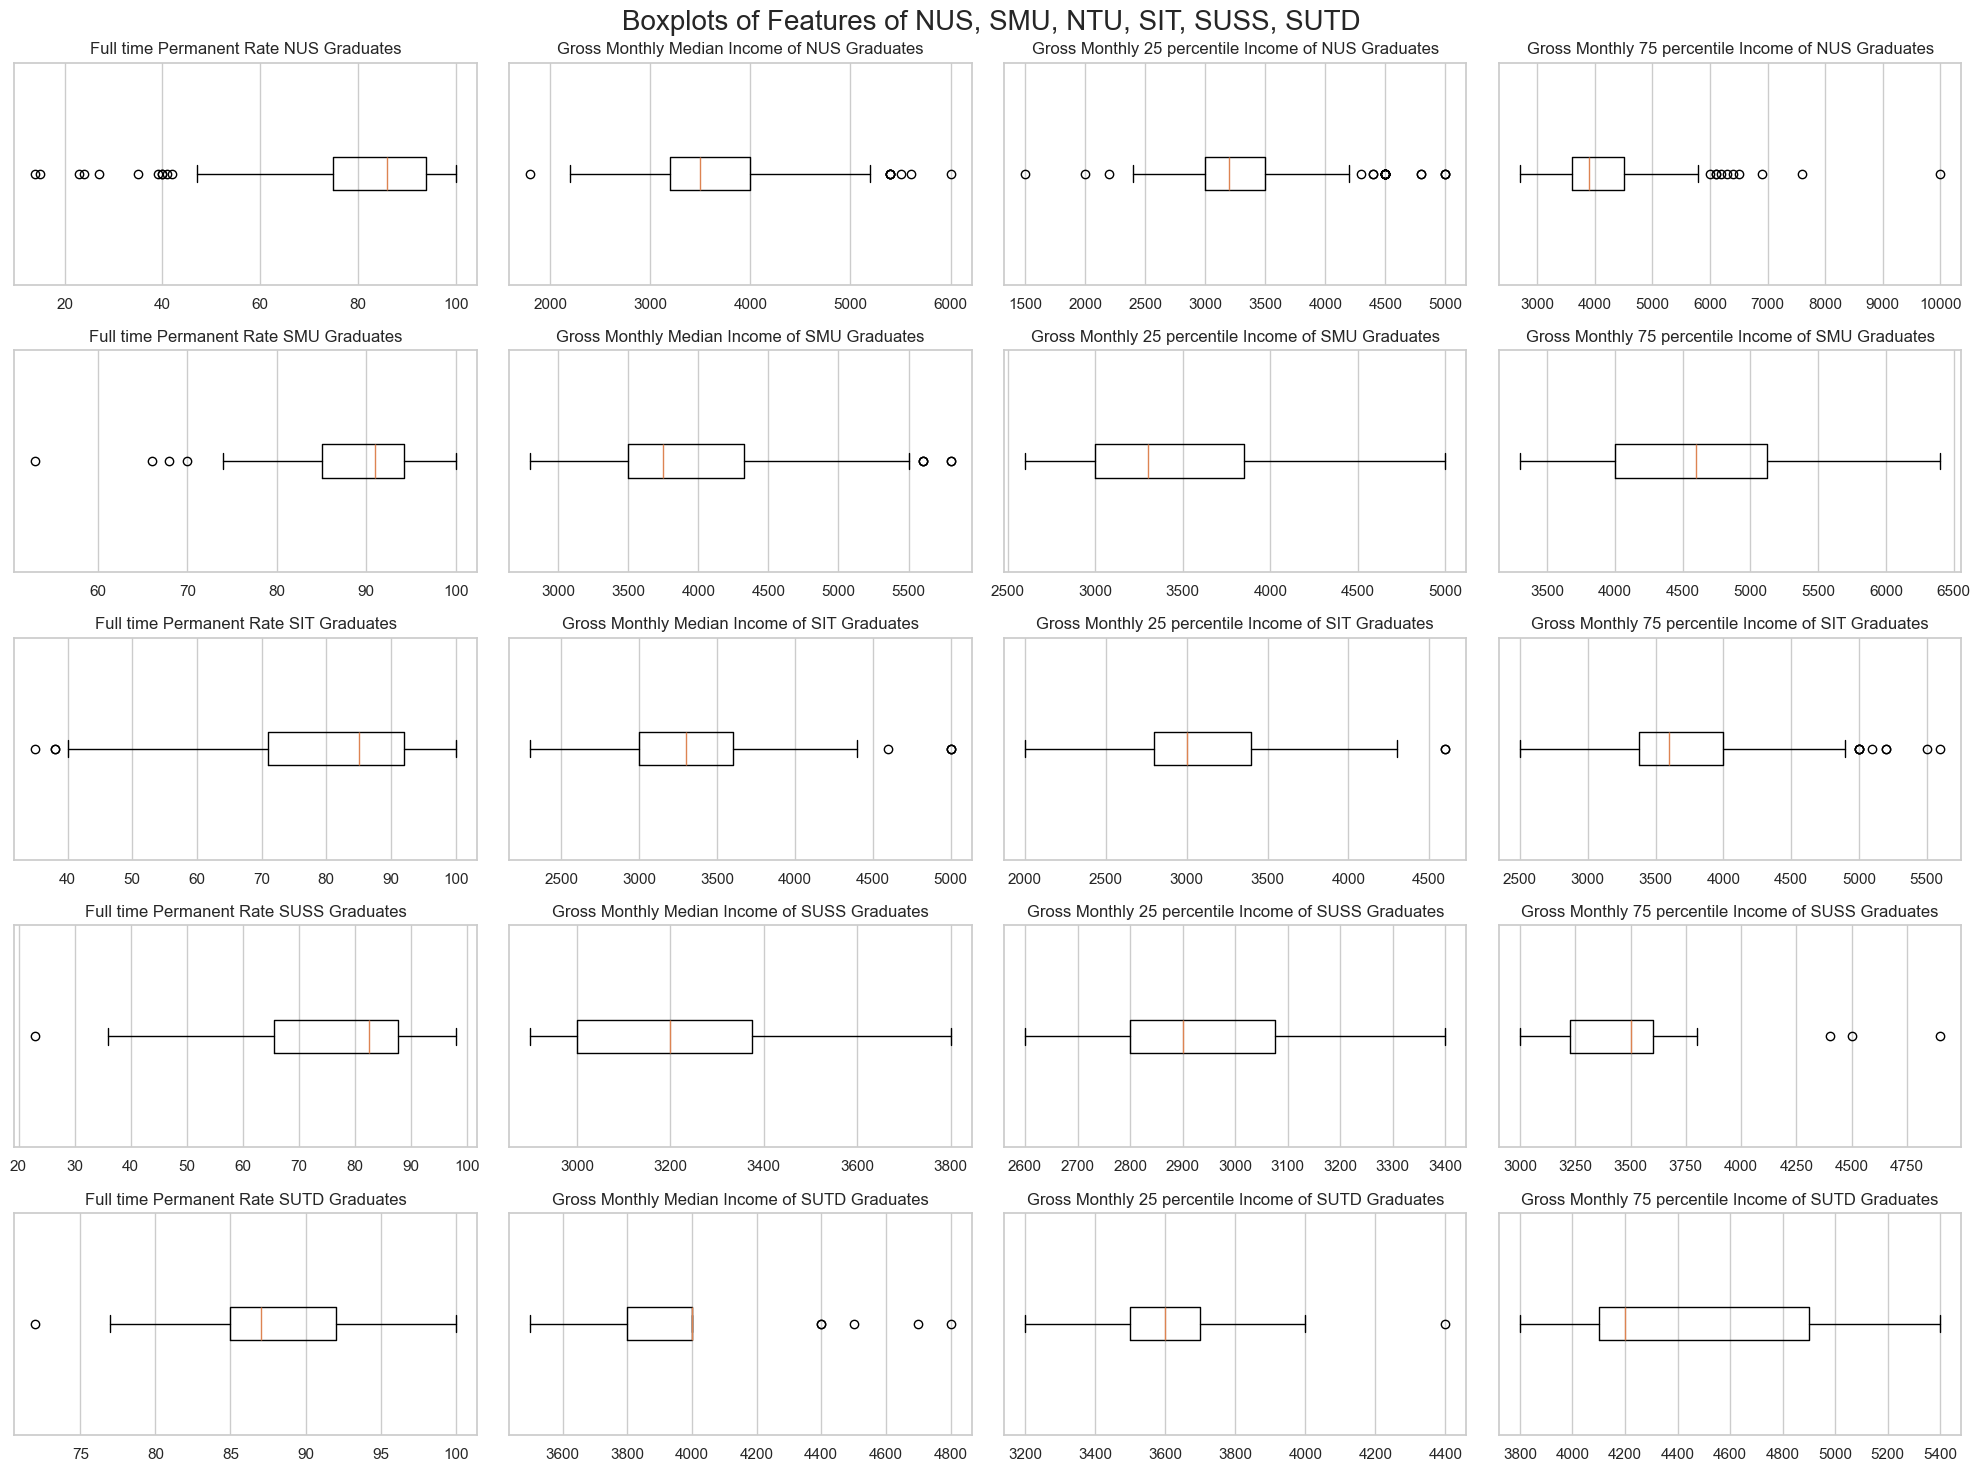

In [16]:
sns.set(style="whitegrid")
plt.figure(figsize=(20,15))
plt.suptitle('Boxplots of Features of NUS, SMU, NTU, SIT, SUSS, SUTD', fontsize=20)

# Plot boxplot
plt.subplot(5, 4, 1)
plt.boxplot(NUS['employment_rate_ft_perm'], vert=False)
plt.title('Full time Permanent Rate NUS Graduates')
plt.yticks([])

plt.subplot(5, 4, 2)
plt.boxplot(NUS['gross_monthly_median'], vert=False)
plt.title('Gross Monthly Median Income of NUS Graduates')
plt.yticks([])

plt.subplot(5, 4, 3)
plt.boxplot(NUS['gross_mthly_25_percentile'], vert=False)
plt.title('Gross Monthly 25 percentile Income of NUS Graduates')
plt.yticks([])

plt.subplot(5, 4, 4)
plt.boxplot(NUS['gross_mthly_75_percentile'], vert=False)
plt.title('Gross Monthly 75 percentile Income of NUS Graduates')
plt.yticks([])

plt.subplot(5, 4, 5)
plt.boxplot(SMU['employment_rate_ft_perm'], vert=False)
plt.title('Full time Permanent Rate SMU Graduates')
plt.yticks([])

plt.subplot(5, 4, 6)
plt.boxplot(SMU['gross_monthly_median'], vert=False)
plt.title('Gross Monthly Median Income of SMU Graduates')
plt.yticks([])

plt.subplot(5, 4, 7)
plt.boxplot(SMU['gross_mthly_25_percentile'], vert=False)
plt.title('Gross Monthly 25 percentile Income of SMU Graduates')
plt.yticks([])

plt.subplot(5, 4, 8)
plt.boxplot(SMU['gross_mthly_75_percentile'], vert=False)
plt.title('Gross Monthly 75 percentile Income of SMU Graduates')
plt.yticks([])
plt.subplot(5, 4, 9)
plt.boxplot(SIT['employment_rate_ft_perm'], vert=False)
plt.title('Full time Permanent Rate SIT Graduates')
plt.yticks([])

plt.subplot(5, 4, 10)
plt.boxplot(SIT['gross_monthly_median'], vert=False)
plt.title('Gross Monthly Median Income of SIT Graduates')
plt.yticks([])

plt.subplot(5, 4, 11)
plt.boxplot(SIT['gross_mthly_25_percentile'], vert=False)
plt.title('Gross Monthly 25 percentile Income of SIT Graduates')
plt.yticks([])

plt.subplot(5, 4, 12)
plt.boxplot(SIT['gross_mthly_75_percentile'], vert=False)
plt.title('Gross Monthly 75 percentile Income of SIT Graduates')
plt.yticks([])
plt.subplot(5, 4, 13)
plt.boxplot(SUSS['employment_rate_ft_perm'], vert=False)
plt.title('Full time Permanent Rate SUSS Graduates')
plt.yticks([])

plt.subplot(5, 4, 14)
plt.boxplot(SUSS['gross_monthly_median'], vert=False)
plt.title('Gross Monthly Median Income of SUSS Graduates')
plt.yticks([])

plt.subplot(5, 4, 15)
plt.boxplot(SUSS['gross_mthly_25_percentile'], vert=False)
plt.title('Gross Monthly 25 percentile Income of SUSS Graduates')
plt.yticks([])

plt.subplot(5, 4, 16)
plt.boxplot(SUSS['gross_mthly_75_percentile'], vert=False)
plt.title('Gross Monthly 75 percentile Income of SUSS Graduates')
plt.yticks([])
plt.subplot(5, 4, 17)
plt.boxplot(SUTD['employment_rate_ft_perm'], vert=False)
plt.title('Full time Permanent Rate SUTD Graduates')
plt.yticks([])

plt.subplot(5, 4, 18)
plt.boxplot(SUTD['gross_monthly_median'], vert=False)
plt.title('Gross Monthly Median Income of SUTD Graduates')
plt.yticks([])

plt.subplot(5, 4, 19)
plt.boxplot(SUTD['gross_mthly_25_percentile'], vert=False)
plt.title('Gross Monthly 25 percentile Income of SUTD Graduates')
plt.yticks([])

plt.subplot(5, 4, 20)
plt.boxplot(SUTD['gross_mthly_75_percentile'], vert=False)
plt.title('Gross Monthly 75 percentile Income of SUTD Graduates')
plt.yticks([])

plt.tight_layout()
plt.show()

Using what I have learnt from Buisness Statistics Module to find anomalies

For a normal distribution:

- Approximately 68% of the data falls within 1 standard deviation, sigma of the mean.
- Approximately 95% falls within 2 standard deviations.
- Approximately 99.7% falls within 3 standard deviations.

$$z = \frac{(X - \mu)}{\sigma} 

In [17]:
# NUS Anomalies
numerical_NUS=NUS[['employment_rate_ft_perm', 'gross_mthly_25_percentile', 'gross_mthly_75_percentile']]

# Calculate z-scores for numerical features
z_scores = (numerical_NUS - numerical_NUS.mean()) / numerical_NUS.std()

# Set the z-score threshold
z_score_limit = 3

# Find rows with numerical anomalies
indices_numerical_anomalies = z_scores.abs().gt(z_score_limit).any(axis=1)
rows_numerical_anomalies = numerical_NUS.loc[indices_numerical_anomalies].index.tolist()

print(f"\nThe rows with numerical anomalies are:\n{rows_numerical_anomalies}")

# Create a new column to indicate which features have anomalies in each row
numerical_NUS['anomaly_feature'] = z_scores.abs().gt(z_score_limit).idxmax(axis=1)

# Display the first 10 rows of anomalies with the corresponding feature(s)
print("\nRows with Anomalies:")
numerical_NUS.loc[indices_numerical_anomalies].head(10)


The rows with numerical anomalies are:
[392, 519, 650, 783, 788, 915, 918, 921, 1044, 1048]

Rows with Anomalies:


,employment_rate_ft_perm,gross_mthly_25_percentile,gross_mthly_75_percentile,anomaly_feature
392,14.0,3000,3500,employment_rate_ft_perm
519,27.0,2000,3000,employment_rate_ft_perm
650,24.0,1500,2700,employment_rate_ft_perm
783,100.0,5000,5700,gross_mthly_25_percentile
788,90.0,4200,10000,gross_mthly_75_percentile
915,23.0,3000,3500,employment_rate_ft_perm
918,100.0,5000,5800,gross_mthly_25_percentile
921,15.0,3100,3400,employment_rate_ft_perm
1044,82.0,3100,7600,gross_mthly_75_percentile
1048,96.0,5000,6900,gross_mthly_25_percentile


In [18]:
# SMU Anomalies
numerical_SMU=SMU[['employment_rate_ft_perm', 'gross_mthly_25_percentile', 'gross_mthly_75_percentile']]

# Calculate z-scores for numerical features
z_scores = (numerical_SMU - numerical_SMU.mean()) / numerical_SMU.std()

# Set the z-score threshold
z_score_limit = 3

# Find rows with numerical anomalies
indices_numerical_anomalies = z_scores.abs().gt(z_score_limit).any(axis=1)
rows_numerical_anomalies = numerical_SMU.loc[indices_numerical_anomalies].index.tolist()

print(f"\nThe rows with numerical anomalies are:\n{rows_numerical_anomalies}")

# Create a new column to indicate which features have anomalies in each row
numerical_SMU['anomaly_feature'] = z_scores.abs().gt(z_score_limit).idxmax(axis=1)

# Display the first 10 rows of anomalies with the corresponding feature(s)
print("\nRows with Anomalies:")
numerical_SMU.loc[indices_numerical_anomalies].head(10)


The rows with numerical anomalies are:
[971]

Rows with Anomalies:


,employment_rate_ft_perm,gross_mthly_25_percentile,gross_mthly_75_percentile,anomaly_feature
971,53.0,3200,4000,employment_rate_ft_perm


In [19]:
# SIT Anomalies
numerical_SIT=SIT[['employment_rate_ft_perm', 'gross_mthly_25_percentile', 'gross_mthly_75_percentile']]

# Calculate z-scores for numerical features
z_scores = (numerical_SIT - numerical_SIT.mean()) / numerical_SIT.std()

# Set the z-score threshold
z_score_limit = 3

# Find rows with numerical anomalies
indices_numerical_anomalies = z_scores.abs().gt(z_score_limit).any(axis=1)
rows_numerical_anomalies = numerical_SIT.loc[indices_numerical_anomalies].index.tolist()

print(f"\nThe rows with numerical anomalies are:\n{rows_numerical_anomalies}")

# Create a new column to indicate which features have anomalies in each row
numerical_SIT['anomaly_feature'] = z_scores.abs().gt(z_score_limit).idxmax(axis=1)

# Display the first 10 rows of anomalies with the corresponding feature(s)
print("\nRows with Anomalies:")
numerical_SIT.loc[indices_numerical_anomalies].head(10)


The rows with numerical anomalies are:
[957, 1069, 1070]

Rows with Anomalies:


,employment_rate_ft_perm,gross_mthly_25_percentile,gross_mthly_75_percentile,anomaly_feature
957,35.0,3400,5000,employment_rate_ft_perm
1069,98.0,4600,5600,gross_mthly_25_percentile
1070,98.0,4600,5500,gross_mthly_25_percentile


In [20]:
# SUTD Anomalies
numerical_SUTD=SUTD[['employment_rate_ft_perm', 'gross_mthly_25_percentile', 'gross_mthly_75_percentile']]

# Calculate z-scores for numerical features
z_scores = (numerical_SUTD - numerical_SUTD.mean()) / numerical_SUTD.std()

# Set the z-score threshold
z_score_limit = 3

# Find rows with numerical anomalies
indices_numerical_anomalies = z_scores.abs().gt(z_score_limit).any(axis=1)
rows_numerical_anomalies = numerical_SUTD.loc[indices_numerical_anomalies].index.tolist()

print(f"\nThe rows with numerical anomalies are:\n{rows_numerical_anomalies}")

# Create a new column to indicate which features have anomalies in each row
numerical_SUTD['anomaly_feature'] = z_scores.abs().gt(z_score_limit).idxmax(axis=1)

# Display the first 10 rows of anomalies with the corresponding feature(s)
print("\nRows with Anomalies:")
numerical_SUTD.loc[indices_numerical_anomalies].head(10)


The rows with numerical anomalies are:
[]

Rows with Anomalies:


,employment_rate_ft_perm,gross_mthly_25_percentile,gross_mthly_75_percentile,anomaly_feature


In [21]:
# SUSS Anomalies
numerical_SUSS=SUSS[['employment_rate_ft_perm', 'gross_mthly_25_percentile', 'gross_mthly_75_percentile']]

# Calculate z-scores for numerical features
z_scores = (numerical_SUSS - numerical_SUSS.mean()) / numerical_SUSS.std()

# Set the z-score threshold
z_score_limit = 3

# Find rows with numerical anomalies
indices_numerical_anomalies = z_scores.abs().gt(z_score_limit).any(axis=1)
rows_numerical_anomalies = numerical_SUSS.loc[indices_numerical_anomalies].index.tolist()

print(f"\nThe rows with numerical anomalies are:\n{rows_numerical_anomalies}")

# Create a new column to indicate which features have anomalies in each row
numerical_SUSS['anomaly_feature'] = z_scores.abs().gt(z_score_limit).idxmax(axis=1)

# Display the first 10 rows of anomalies with the corresponding feature(s)
print("\nRows with Anomalies:")
numerical_SUSS.loc[indices_numerical_anomalies].head(10)


The rows with numerical anomalies are:
[]

Rows with Anomalies:


,employment_rate_ft_perm,gross_mthly_25_percentile,gross_mthly_75_percentile,anomaly_feature


<b><u>Observations</u></b>

Using what I have learnt from Buisness Statistics Module, 

For a normal distribution:

- Approximately 68% of the data falls within 1 standard deviation, sigma of the mean.
- Approximately 95% falls within 2 standard deviations.
- Approximately 99.7% falls within 3 standard deviations.

$$z = \frac{(X - \mu)}{\sigma} 

<h3>For 3 Standard Deviations</h3>
<hr></hr>
<h4>Anomalies for NUS Graduates:</h4>
<ul>
<li><b>employment_rate_ft_perm: 14, 15, 23, 24, 27%</b>(lower tail)</li>
<li><b>gross_mthly_25_percentile: $1500, 2000, 3000, 3100</b>(lower tail)</li>
<li><b>gross_mthly_75_percentile: $3100 (min), $10000 (max)</b></li>
</ul>

<h4>Anomalies for SMU Graduates:</h4>
<ul>
<li><b>employment_rate_ft_perm: 53%</b>(lower tail)</li>
</ul>

<h4>Anomalies for SIT Graduates:</h4>
<ul>
<li><b>employment_rate_ft_perm: 35%</b>(lower tail)</li>
<li><b>gross_mthly_25_percentile: $4600</b>(upper tail)</li>
</ul>

<h4>Anomalies for SUTD Graduates:</h4>
<ul>
<li><b>None</b></li>
</ul>

<h4>Anomalies for SUSS Graduates:</h4>
<ul>
<li><b>None </b></li>
</ul>

In [22]:
# Finding the degrees that are the anomalies

# Anomalies for NUS Graduates
nus_anomalies = NUS[
    (NUS['employment_rate_ft_perm'].isin([14, 15, 23, 24, 27])) |
    (NUS['gross_mthly_25_percentile'].isin([1500, 2000, 3000, 3100])) |
    ((NUS['gross_mthly_75_percentile'] <= 3100) | (NUS['gross_mthly_75_percentile'] >= 10000))
]

# Anomalies for SMU Graduates
smu_anomalies = SMU[SMU['employment_rate_ft_perm'] == 53]

# Anomalies for SIT Graduates
sit_anomalies = SIT[
    (SIT['employment_rate_ft_perm'] == 35) |
    (SIT['gross_mthly_25_percentile'] == 4600)
]


In [23]:
# Display the degrees obtained by the uni grads which are anomalies in the dataset
nus_anomalies_degree=nus_anomalies['degree']
nus_anomalies_degree=pd.DataFrame(nus_anomalies_degree)

smu_anomalies_degree=smu_anomalies['degree']
smu_anomalies_degree=pd.DataFrame(smu_anomalies_degree)

sit_anomalies_degree=sit_anomalies['degree']
sit_anomalies_degree=pd.DataFrame(sit_anomalies_degree)

# I want a final dataset for all the degrees that are outliers and since i want all the them, 
# so i use how='outer' to get all degrees from both DataFrames in the anomalies_degrees dataframe
anomalies_degrees=pd.merge(nus_anomalies_degree, smu_anomalies_degree, on='degree', how='outer')
anomalies_degrees=pd.merge(anomalies_degrees, sit_anomalies_degree, on='degree', how='outer')
anomalies_degrees.head(30)

,degree
0,Bachelor of Arts
1,Bachelor of Arts
2,Bachelor of Business Administration (Accountancy)
3,Bachelor of Business Administration (Accountancy)
4,Bachelor of Business Administration (Accountancy)
5,Bachelor of Business Administration (Accountancy)
6,Bachelor of Business Administration (Accountancy)
7,Bachelor of Computing (Computer Science)
8,Bachelor of Computing (Information Systems)
9,Bachelor of Computing (Information Systems)


<h4>Boxplots </h4>
<hr></hr>
Visualise Anomalies of Different Variables in Merged_df

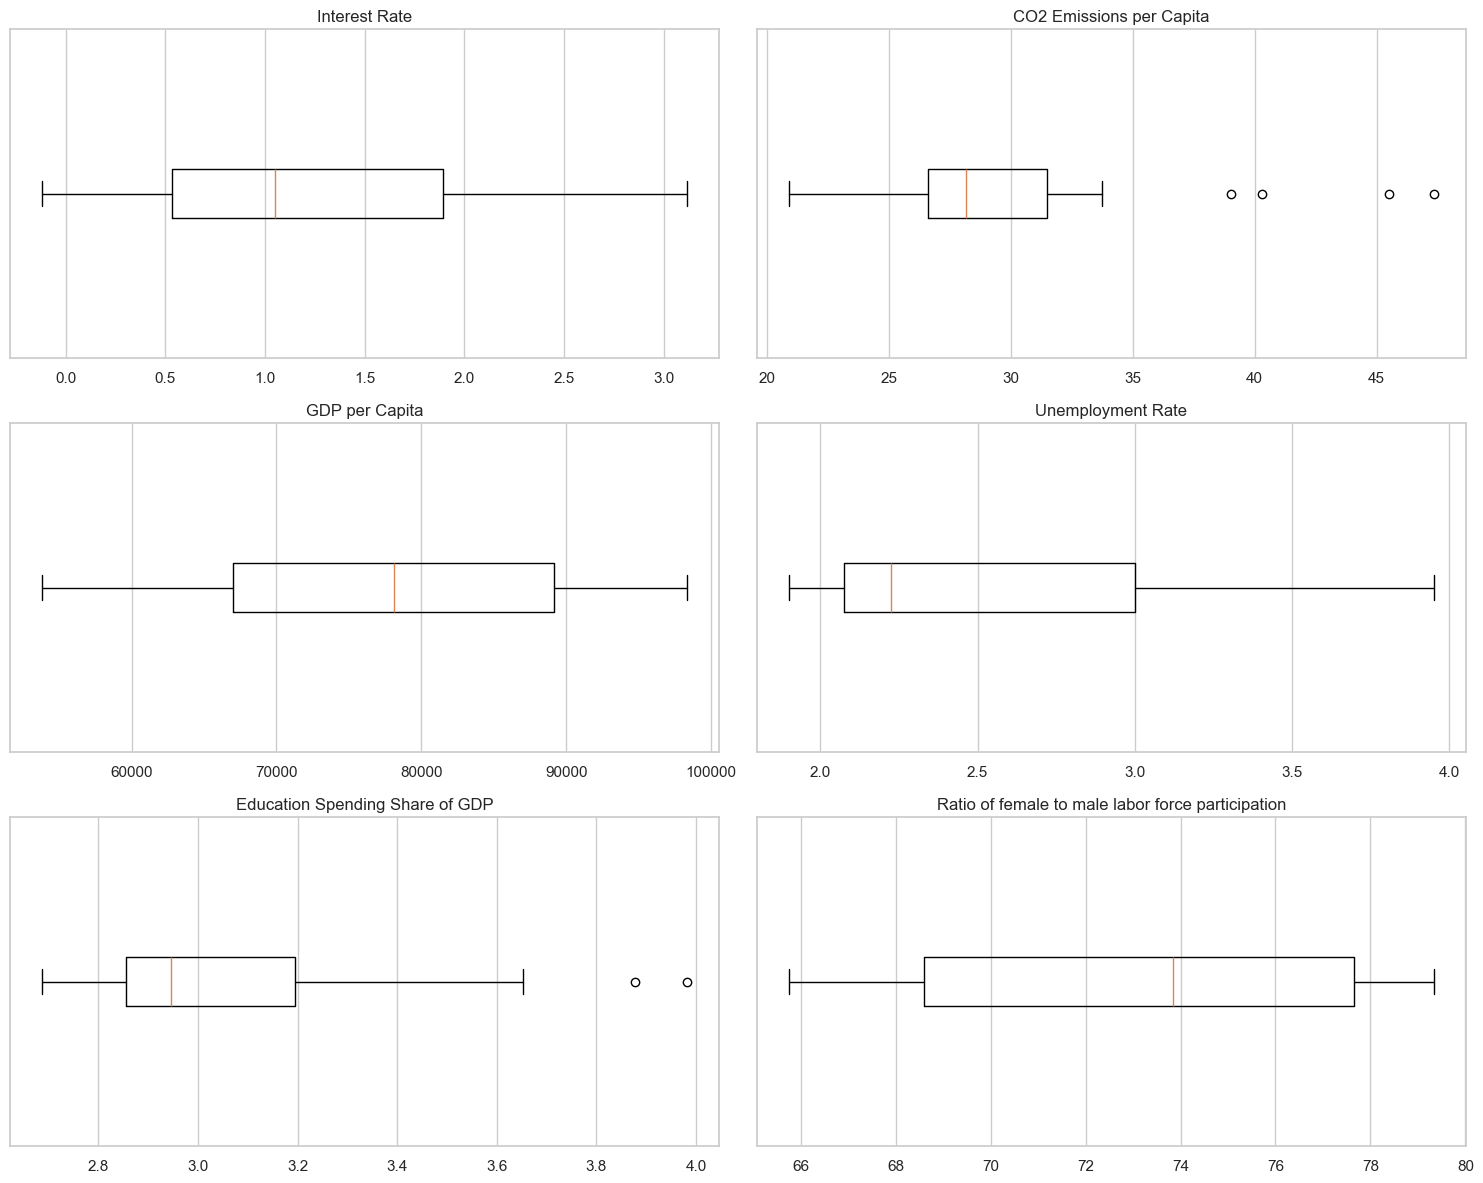

In [24]:
# Create boxplots
plt.figure(figsize=(15, 12))

# Plot 1: Interest Rate
plt.subplot(3, 2, 1)
plt.boxplot(merged_df['Interest Rate'], vert=False)
plt.title('Interest Rate')
plt.yticks([])

# Plot 2: CO2 Emissions per Capita
plt.subplot(3, 2, 2)
plt.boxplot(merged_df['CO2 Emissions per Capita'], vert=False)
plt.title('CO2 Emissions per Capita')
plt.yticks([])

# Plot 3: GDP per Capita
plt.subplot(3, 2, 3)
plt.boxplot(merged_df['GDP per Capita'], vert=False)
plt.title('GDP per Capita')
plt.yticks([])

# Plot 4: Unemployment Rate
plt.subplot(3, 2, 4)
plt.boxplot(merged_df['Unemployment Rate'], vert=False)
plt.title('Unemployment Rate')
plt.yticks([])

# Plot 5: Your Education Spending Share of GDP Plot
plt.subplot(3, 2, 5)
plt.boxplot(merged_df['Education Spending Share of GDP'], vert=False)
plt.title('Education Spending Share of GDP')
plt.yticks([])

# Plot 6: Your Ratio of female to male labor force participation Plot
plt.subplot(3, 2, 6)
plt.boxplot(merged_df['Ratio of female to male labor force participation'], vert=False)
plt.title('Ratio of female to male labor force participation')
plt.yticks([])


plt.tight_layout()
plt.show()


Note that since interest rate, GDP per Capita, unemployment rate and ratio of female to male labor force participation all have normal distribution and has no anomalies,

it shows that these data are quite consistent over 20 years

In [25]:
# Using data from the graph, we can also find the anomalies,
CO2_anomalies_row = merged_df[(merged_df['CO2 Emissions per Capita'] > 35)]
Unemp_anomalies_row=merged_df[(merged_df['Unemployment Rate'] > 3.75)]
spending_on_edu_anomalies_row=merged_df[(merged_df['Education Spending Share of GDP'] > 3.75)]

# Display the filtered rows
CO2_anomalies_row.head(10)

,Interest Rate,CO2 Emissions per Capita,GDP per Capita,Population,Unemployment Rate,Education Spending Share of GDP,Country,Ratio of female to male labor force participation
Year,,,,,,,,
2008,1.303333,39.013966,71464.930,4838404.0,2.225,2.76460,Singapore,72.886960
2011,0.524167,40.311684,81258.086,5281351.0,2.025,3.03077,Singapore,74.970375
2012,-0.013333,45.488340,82805.620,5381003.0,1.950,3.07086,Singapore,75.801130
2013,0.288333,47.334576,85400.730,5478063.0,1.900,2.85435,Singapore,76.442630


In [26]:
Unemp_anomalies_row.head(10)

,Interest Rate,CO2 Emissions per Capita,GDP per Capita,Population,Unemployment Rate,Education Spending Share of GDP,Country,Ratio of female to male labor force participation
Year,,,,,,,,
2003,1.445833,24.346886,58819.957,4226417.0,3.95,3.98194,Singapore,67.153366


In [27]:
spending_on_edu_anomalies_row.head(10)

,Interest Rate,CO2 Emissions per Capita,GDP per Capita,Population,Unemployment Rate,Education Spending Share of GDP,Country,Ratio of female to male labor force participation
Year,,,,,,,,
2002,2.033333,26.616610,55437.560,4176799.0,3.55,3.87853,Singapore,65.750320
2003,1.445833,24.346886,58819.957,4226417.0,3.95,3.98194,Singapore,67.153366


<h4><u>Observations</u></h4>

From the boxplot and the extraction of the points, I can conclude that in Singapore,

<b>CO2 Emissions per Capita</b> were <b>especially high during 2008 and from 2011 to 2013</b> with cost of CO2 emissions ranging from <b>$39.01 to $47.33</b>

<u>Further Research</u>

Between 2011 and 2013, Singapore experienced a notable increase in CO2 emissions. Due to...

Economic Growth:

Singapore's economic development during this period resulted in increased industrial activity, leading to higher energy consumption and carbon emissions per dollar of GDP

Source: https://www.nccs.gov.sg/singapores-climate-action/singapores-climate-targets/singapore-emissions-profile/
<hr></hr> 
<b>Unemployment Rates</b> were also <b>especially high during 2003</b> with unemployment rate increasing to <b>3.95% almost reaching 4 whole%</b>

<u>Further Research</u>

The high unemployment rate in Singapore in 2003 is due to 

Global Economic Challenges: 

The early 2000s witnessed a period of global economic uncertainty, including the aftermath of the dot-com bubble burst and geopolitical tensions.

These factors adversely affected global trade and economic stability, impacting Singapore's export-oriented economy

Source: https://sea.mashable.com/culture/11028/singapores-unemployment-rate-is-the-highest-it-has-been-in-10-years-what-happened
<hr></hr>
<b>Public Spending on Education as a share of GDP</b> were <b>especially high from 2002 and 2003</b> with <b>about 3.9 - 4% of GDP going to Public Spending on Education</b>

<u>Further Research</u>

The high percentage of GDP going to Education is because of the 

Government Commitment: 

The Singaporean government has consistently demonstrated a strong commitment to education. 

This commitment is reflected in substantial financial allocations to ensure the quality and effectiveness of the education system.

Source:https://data.worldbank.org/indicator/SE.XPD.TOTL.GD.ZS?locations=SG
<hr></hr>

These explain the anomalies so there is no need to remove or impute away the anomalies as they are natural anomalies and removing them may cause the model to be inaccurate at predicting the future unemployment rates in Singapore

<h4>Bivariate Analysis</h4>
<hr></hr>
Analysing the relationships between the different variables.

<b>Pairplot</b>

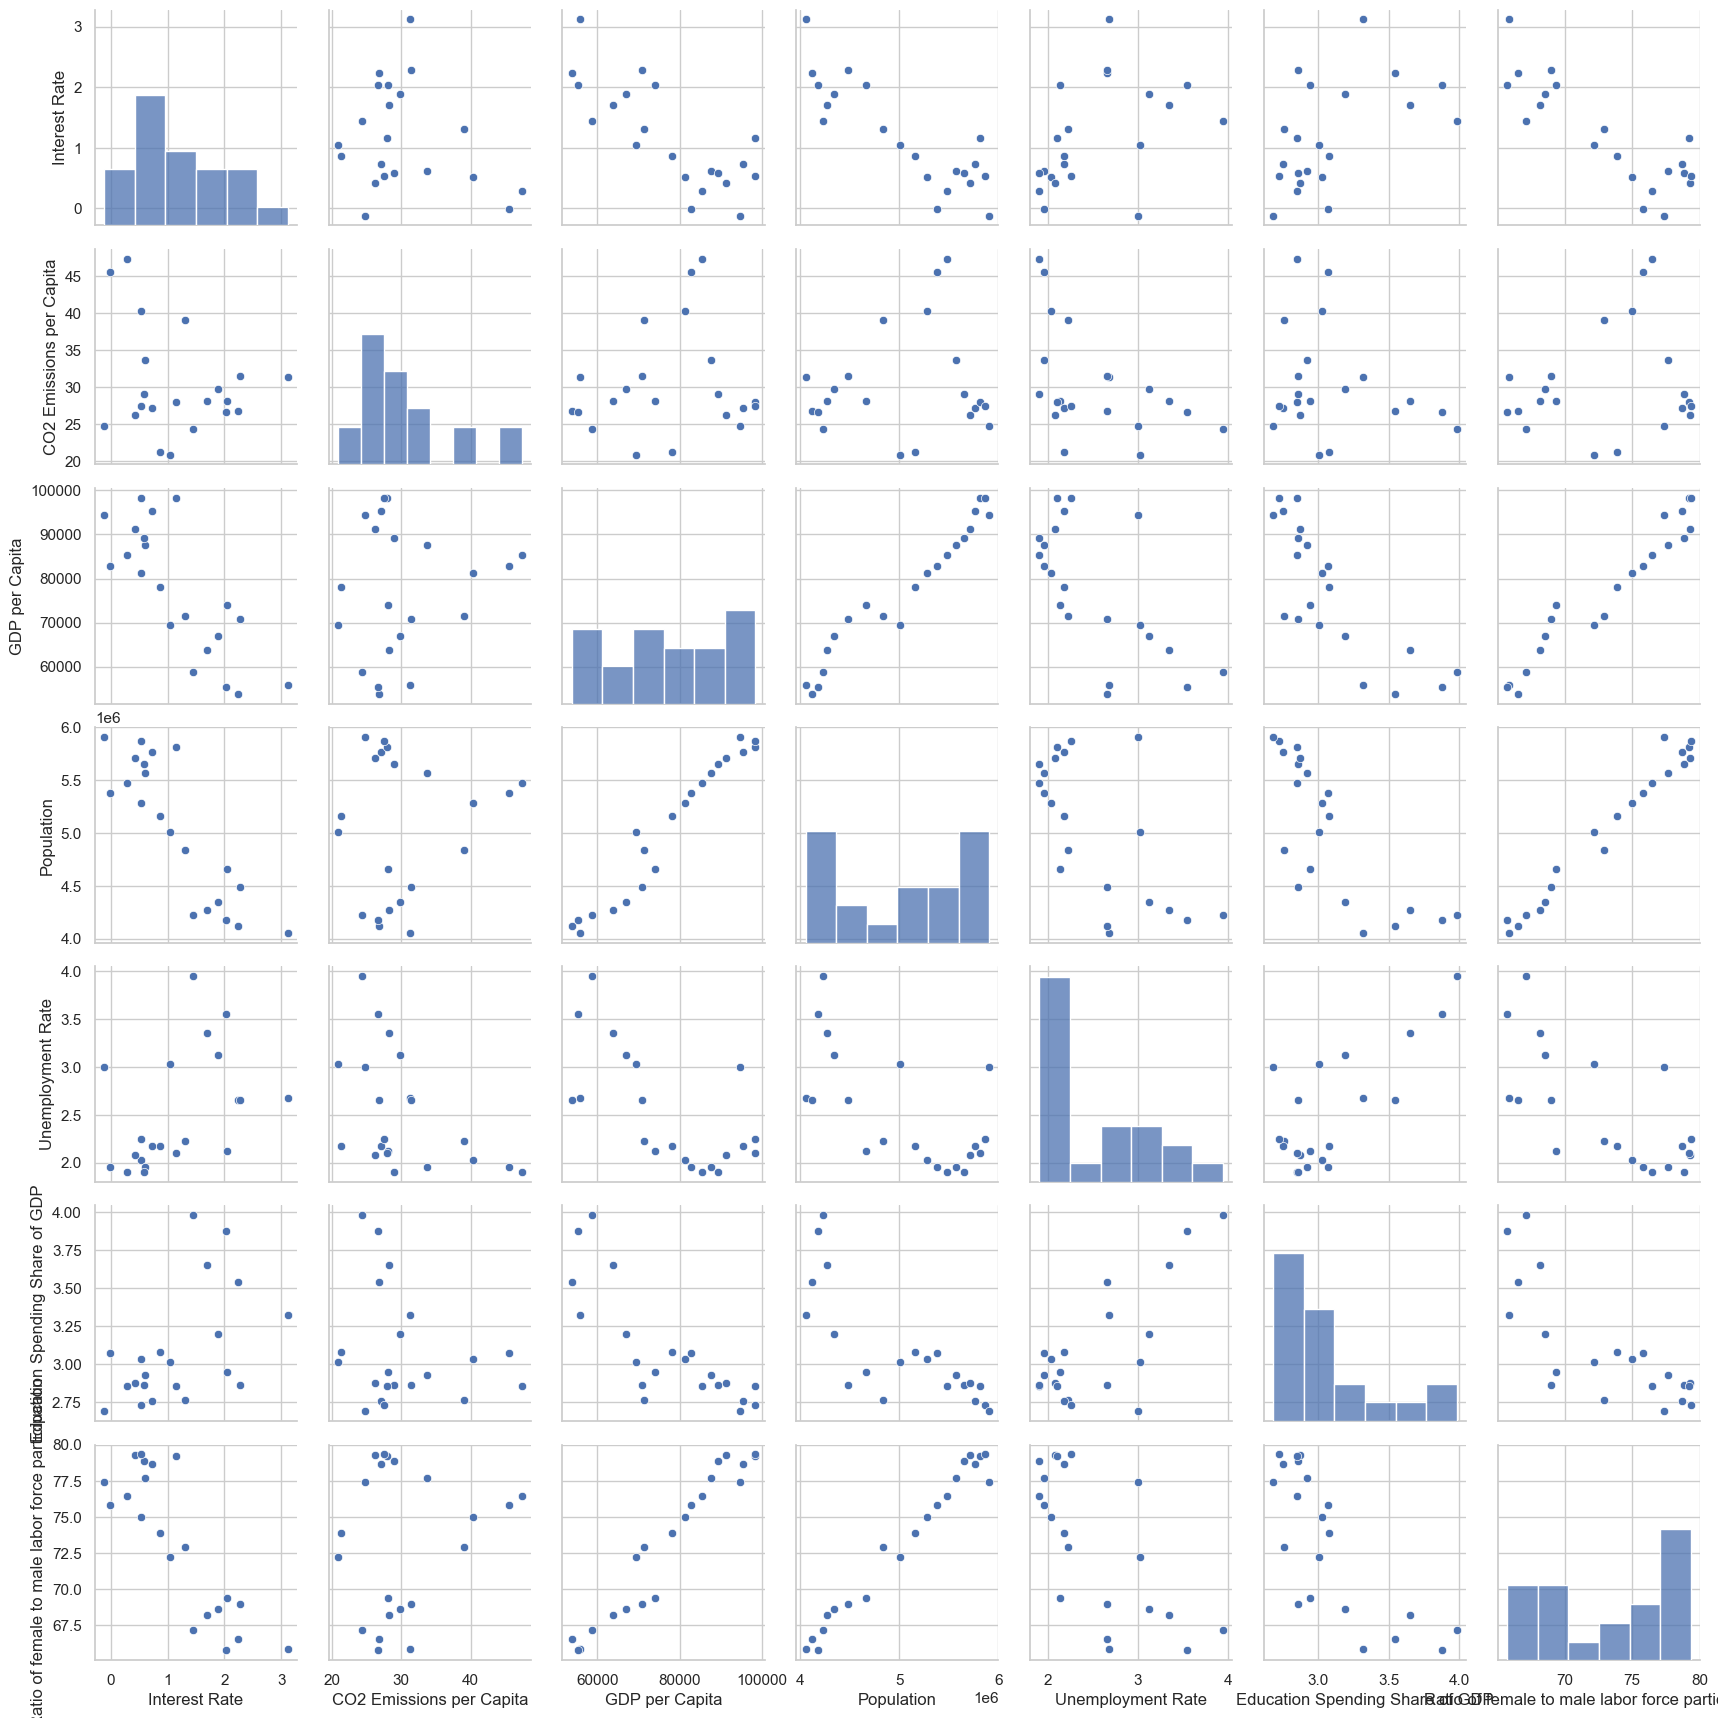

In [28]:
sns.pairplot(merged_df)
plt.show()

<b><u>Observation</u></b>

From the above, we can see that population has an extremely strong correlation with GDP per Capita, 

hence Population column would be dropped.
As seen from this selecetd picture


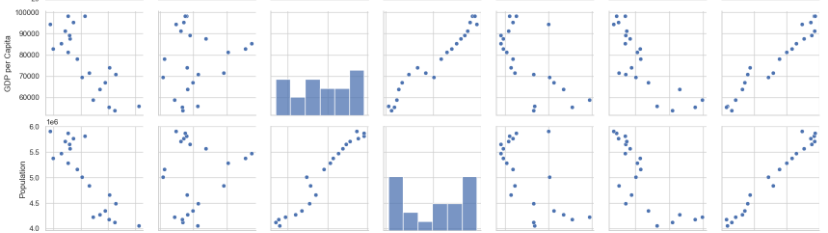

In [29]:
merged_df=merged_df.drop(columns=['Population'])
print(merged_df)

      Interest Rate  CO2 Emissions per Capita  GDP per Capita  \
Year                                                            
2000       3.116667                 31.327715       55904.234   
2001       2.237500                 26.756609       53833.727   
2002       2.033333                 26.616610       55437.560   
2003       1.445833                 24.346886       58819.957   
2004       1.700833                 28.183523       63862.125   
2005       1.890833                 29.796038       66973.550   
2006       2.283333                 31.480589       70756.445   
2007       2.040000                 28.139220       73992.125   
2008       1.303333                 39.013966       71464.930   
2009       1.047500                 20.893599       69430.484   
2010       0.870833                 21.287973       78115.210   
2011       0.524167                 40.311684       81258.086   
2012      -0.013333                 45.488340       82805.620   
2013       0.288333      

As we are trying to predict unemployment rate against other factors, 

this column is important, as we need to look at how other independant factors may affect unemployment rate

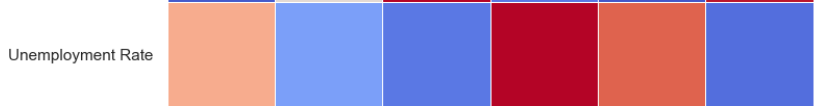

<hr><h3>Creating the prediction Model</h3>
<hr>

In [30]:
# Renaming all with a _ to remove the spacing as the formula does not all the spacing for variables
merged_df=merged_df.rename(columns={'CO2 Emissions per Capita':'CO2_Emissions_per_Capita',
                                    'Interest Rate':'Interest_Rate',
                                    'Unemployment Rate':'Unemployment_Rate',
                                    'GDP per Capita':'GDP_per_Capita',
                                    'Education Spending Share of GDP':'Education_Spending_Share_of_GDP',
                                    'Ratio of female to male labor force participation':'Ratio_of_female_to_male_labor_force_participation'
})
merged_df.head(21)


,Interest_Rate,CO2_Emissions_per_Capita,GDP_per_Capita,Unemployment_Rate,Education_Spending_Share_of_GDP,Country,Ratio_of_female_to_male_labor_force_participation
Year,,,,,,,
2000,3.116667,31.327715,55904.234,2.675,3.321300,Singapore,65.878944
2001,2.237500,26.756609,53833.727,2.650,3.542490,Singapore,66.561280
2002,2.033333,26.616610,55437.560,3.550,3.878530,Singapore,65.750320
2003,1.445833,24.346886,58819.957,3.950,3.981940,Singapore,67.153366
2004,1.700833,28.183523,63862.125,3.350,3.652760,Singapore,68.193190
2005,1.890833,29.796038,66973.550,3.125,3.195960,Singapore,68.588920
2006,2.283333,31.480589,70756.445,2.650,2.859120,Singapore,68.983430
2007,2.040000,28.139220,73992.125,2.125,2.946750,Singapore,69.379845
2008,1.303333,39.013966,71464.930,2.225,2.764600,Singapore,72.886960


In [31]:
merged_df['Year']=merged_df.index
merged_df.reset_index(drop=True, inplace=True)
merged_df

,Interest_Rate,CO2_Emissions_per_Capita,GDP_per_Capita,Unemployment_Rate,Education_Spending_Share_of_GDP,Country,Ratio_of_female_to_male_labor_force_participation,Year
0,3.116667,31.327715,55904.234,2.675,3.321300,Singapore,65.878944,2000
1,2.237500,26.756609,53833.727,2.650,3.542490,Singapore,66.561280,2001
2,2.033333,26.616610,55437.560,3.550,3.878530,Singapore,65.750320,2002
3,1.445833,24.346886,58819.957,3.950,3.981940,Singapore,67.153366,2003
4,1.700833,28.183523,63862.125,3.350,3.652760,Singapore,68.193190,2004
5,1.890833,29.796038,66973.550,3.125,3.195960,Singapore,68.588920,2005
6,2.283333,31.480589,70756.445,2.650,2.859120,Singapore,68.983430,2006
7,2.040000,28.139220,73992.125,2.125,2.946750,Singapore,69.379845,2007
8,1.303333,39.013966,71464.930,2.225,2.764600,Singapore,72.886960,2008
9,1.047500,20.893599,69430.484,3.025,3.010130,Singapore,72.205370,2009


<h4>Finding the best formula</h4>
<hr></hr>
There are many independant variables, but which ones help in predicting Unemployment Rate the best?

We will find out here using OLS as trial model!

In [68]:
# Define the initial formula
formula = 'Unemployment_Rate ~ Year + Interest_Rate + GDP_per_Capita + CO2_Emissions_per_Capita + Education_Spending_Share_of_GDP + Ratio_of_female_to_male_labor_force_participation' 

# Fit the initial model
modelOLS = sm.OLS.from_formula(formula=formula, data=merged_df).fit()

# Get initial summary
initial_summary = modelOLS.summary()

######################################################################################
# FROM CHATGPT
######################################################################################
# Get initial p-values and R-squared
initial_pvalues = modelOLS.pvalues
initial_rsquared = modelOLS.rsquared

# Backward elimination loop
while True:
    # Find the variable with the highest p-value
    max_pvalue = max(initial_pvalues)
    if max_pvalue > 0.05:  # You can adjust the significance level
        # Remove the variable with the highest p-value
        variable_to_remove = initial_pvalues[initial_pvalues == max_pvalue].index[0]
        formula = formula.replace(f" + {variable_to_remove}", "")
        
        # Fit the updated model
        modelOLS = sm.OLS.from_formula(formula=formula, data=merged_df).fit()

        # Update p-values and R-squared
        initial_pvalues = modelOLS.pvalues
        initial_rsquared = modelOLS.rsquared
    else:
        break

# Get the final summary
final_summary = modelOLS.summary()

# Print the final formula, p-values, and R-squared
print("Final Formula:", formula)
print("Final P-Values:", initial_pvalues)
print("Final R-Squared:", initial_rsquared)
print(final_summary)
######################################################################################


Final Formula: Unemployment_Rate ~ Year + GDP_per_Capita + Education_Spending_Share_of_GDP + Ratio_of_female_to_male_labor_force_participation
Final P-Values: Intercept                                            0.000102
Year                                                 0.000092
GDP_per_Capita                                       0.025565
Education_Spending_Share_of_GDP                      0.002582
Ratio_of_female_to_male_labor_force_participation    0.000501
dtype: float64
Final R-Squared: 0.8665104356299312
                            OLS Regression Results                            
Dep. Variable:      Unemployment_Rate   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     25.96
Date:                Mon, 05 Feb 2024   Prob (F-statistic):           8.00e-07
Time:                        17:08:01   Log-Likelihood:                 2.4476
No. Ob

In [33]:
# Define the Final formula
formula = 'Unemployment_Rate ~ Year + GDP_per_Capita + Education_Spending_Share_of_GDP + Ratio_of_female_to_male_labor_force_participation' 

# Fit the Final model
modelOLS = sm.OLS.from_formula(formula=formula, data=merged_df).fit()

# Get Final summary
final_summary = modelOLS.summary()
print(final_summary)

                            OLS Regression Results                            
Dep. Variable:      Unemployment_Rate   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     25.96
Date:                Mon, 05 Feb 2024   Prob (F-statistic):           8.00e-07
Time:                        16:10:02   Log-Likelihood:                 2.4476
No. Observations:                  21   AIC:                             5.105
Df Residuals:                      16   BIC:                             10.33
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

<hr></hr>
<h4>Finding the best linear regression model</h4>
<hr></hr>
<b>OLS:</b> Ordinary Least Squares

<b>GLS:</b> Generalized Least Squares

<b>WLS:</b> Weighted Least Squares

In [34]:
formula = 'Unemployment_Rate ~ Year + GDP_per_Capita + Education_Spending_Share_of_GDP + Ratio_of_female_to_male_labor_force_participation' 

modelGLS = sm.GLS.from_formula(formula=formula, data=merged_df).fit()

final_summary = modelGLS.summary()
print(final_summary)

                            GLS Regression Results                            
Dep. Variable:      Unemployment_Rate   R-squared:                       0.867
Model:                            GLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     25.96
Date:                Mon, 05 Feb 2024   Prob (F-statistic):           8.00e-07
Time:                        16:10:02   Log-Likelihood:                 2.4476
No. Observations:                  21   AIC:                             5.105
Df Residuals:                      16   BIC:                             10.33
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [35]:
# Define the Final formula
formula = 'Unemployment_Rate ~ Year + GDP_per_Capita + Education_Spending_Share_of_GDP + Ratio_of_female_to_male_labor_force_participation' 

# Fit the Final model
modelWLS = sm.WLS.from_formula(formula=formula, data=merged_df).fit()

final_summary = modelWLS.summary()
print(final_summary)

                            WLS Regression Results                            
Dep. Variable:      Unemployment_Rate   R-squared:                       0.867
Model:                            WLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     25.96
Date:                Mon, 05 Feb 2024   Prob (F-statistic):           8.00e-07
Time:                        16:10:02   Log-Likelihood:                 2.4476
No. Observations:                  21   AIC:                             5.105
Df Residuals:                      16   BIC:                             10.33
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

As all results from OLS, WLS and GLS are the same, I would be sticking to OLS model for the code below

In [36]:
# Creating the dataframe that contains all the independant variables that influence Unemployement Rate --> to be used in prediction
prediction_data = pd.DataFrame({
    'Year': merged_df['Year'],
    'GDP_per_Capita': merged_df['GDP_per_Capita'], 
    'Education_Spending_Share_of_GDP': merged_df['Education_Spending_Share_of_GDP'],
    'Ratio_of_female_to_male_labor_force_participation': merged_df['Ratio_of_female_to_male_labor_force_participation']
})


# Use the model to predict values
predicted_unemployment = modelOLS.predict(prediction_data)

# Create a DataFrame for the predicted unemployment rates
predicted_unemployment_df = pd.DataFrame({
    'Year': merged_df['Year'],
    'Predicted_Unemployment_Rate': predicted_unemployment
})

# Verify the new DataFrame
print(predicted_unemployment_df)


    Year  Predicted_Unemployment_Rate
0   2000                     2.652427
1   2001                     3.113193
2   2002                     3.758944
3   2003                     3.646497
4   2004                     3.128693
5   2005                     2.743701
6   2006                     2.424542
7   2007                     2.510656
8   2008                     2.072277
9   2009                     2.828330
10  2010                     2.323800
11  2011                     2.147427
12  2012                     2.204094
13  2013                     2.011269
14  2014                     1.977206
15  2015                     1.872642
16  2016                     1.957318
17  2017                     2.011116
18  2018                     2.095992
19  2019                     2.241140
20  2020                     3.103736


In [37]:
actual_vs_predict_unemp_rate=pd.merge(merged_df[['Year','Unemployment_Rate']], predicted_unemployment_df, on='Year', how='inner')
print(actual_vs_predict_unemp_rate)

    Year  Unemployment_Rate  Predicted_Unemployment_Rate
0   2000              2.675                     2.652427
1   2001              2.650                     3.113193
2   2002              3.550                     3.758944
3   2003              3.950                     3.646497
4   2004              3.350                     3.128693
5   2005              3.125                     2.743701
6   2006              2.650                     2.424542
7   2007              2.125                     2.510656
8   2008              2.225                     2.072277
9   2009              3.025                     2.828330
10  2010              2.175                     2.323800
11  2011              2.025                     2.147427
12  2012              1.950                     2.204094
13  2013              1.900                     2.011269
14  2014              1.950                     1.977206
15  2015              1.900                     1.872642
16  2016              2.075    

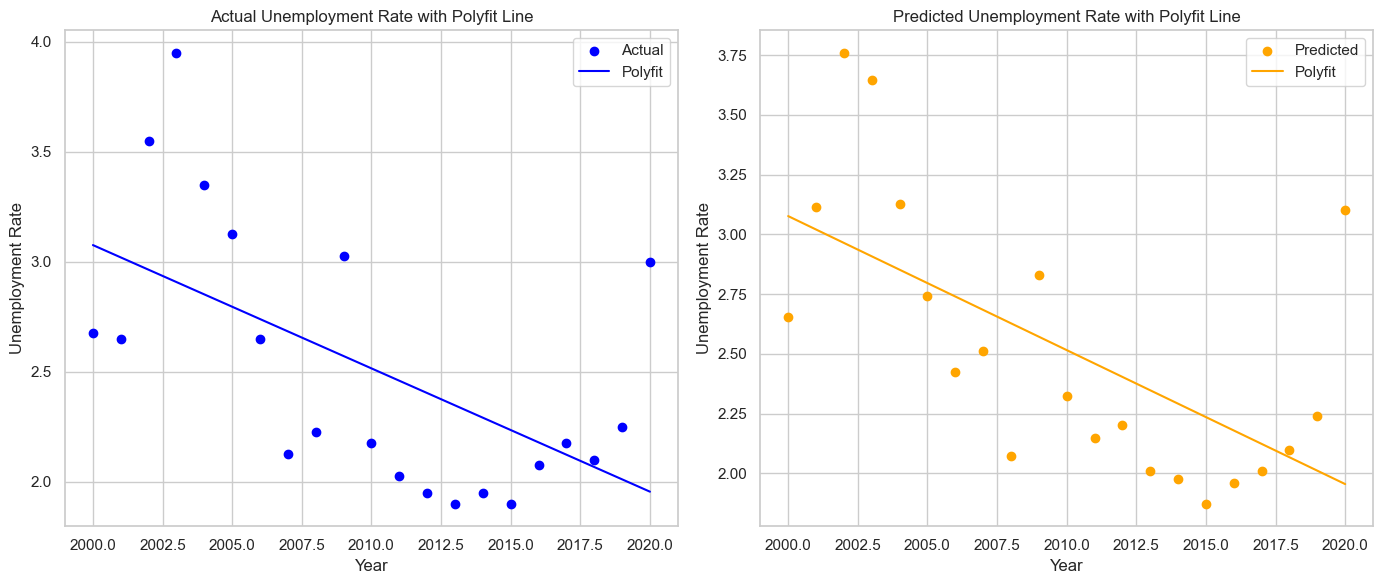

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot for Actual Unemployment Rates
axes[0].scatter(actual_vs_predict_unemp_rate['Year'], actual_vs_predict_unemp_rate['Unemployment_Rate'], label='Actual', color='blue')
actual_polyfit = np.polyfit(actual_vs_predict_unemp_rate['Year'], actual_vs_predict_unemp_rate['Unemployment_Rate'], 1)
actual_line = np.poly1d(actual_polyfit)
axes[0].plot(actual_vs_predict_unemp_rate['Year'], actual_line(actual_vs_predict_unemp_rate['Year']), color='blue', linestyle='-', label='Polyfit')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Unemployment Rate')
axes[0].set_title('Actual Unemployment Rate with Polyfit Line')
axes[0].legend()

# Plot for Predicted Unemployment Rates
axes[1].scatter(actual_vs_predict_unemp_rate['Year'], actual_vs_predict_unemp_rate['Predicted_Unemployment_Rate'], label='Predicted', color='orange')
predicted_polyfit = np.polyfit(actual_vs_predict_unemp_rate['Year'], actual_vs_predict_unemp_rate['Predicted_Unemployment_Rate'], 1)
predicted_line = np.poly1d(predicted_polyfit)
axes[1].plot(actual_vs_predict_unemp_rate['Year'], predicted_line(actual_vs_predict_unemp_rate['Year']), color='orange', linestyle='-', label='Polyfit')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Unemployment Rate')
axes[1].set_title('Predicted Unemployment Rate with Polyfit Line')
axes[1].legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

<u>From the graph,</u>

we can see that both the <b>predicted and actual unemployment rates in Singapore</b> are <b>decreasing as years goes by</b>

but <b>more importantly,</b> the graph also show that my prediction model is <b>able to predict the anomalies quite well</b> 

which <b>further shows that my model is quite accurate</b>

<u>Note that in 2020,</u>

<b>the anomaly in Unemployment Rate</b> was because of the <b>sudden impact of the COVID-19 Epidemic</b> that 

caused many business to <b>shut down or reduce operations</b> that resulted in <b>unemployment rate to shoot up to 3%</b>

<u>Side note: </u>

Why did i separate the actual and predicted Unemployment Rate into 1 subplot?

It is because the polyfit line was exactly the same for both of them causing it to overlap, so i had to subplot it to make it clearer

If you want to check the overlap, you can uncomment the code below

In [39]:
# # Set the figure size
# plt.figure(figsize=(10, 6))

# # Scatter plot for actual unemployment rates
# plt.scatter(actual_vs_predict_unemp_rate['Year'], actual_vs_predict_unemp_rate['Unemployment_Rate'], label='Actual', color='blue')

# # Fit and plot a polynomial regression line for actual unemployment rates
# actual_polyfit = np.polyfit(actual_vs_predict_unemp_rate['Year'], actual_vs_predict_unemp_rate['Unemployment_Rate'], 1)
# actual_line = np.poly1d(actual_polyfit)
# plt.plot(actual_vs_predict_unemp_rate['Year'], actual_line(actual_vs_predict_unemp_rate['Year']), color='blue', linestyle='--', label='Actual Polyfit')

# # Scatter plot for predicted unemployment rates
# plt.scatter(actual_vs_predict_unemp_rate['Year'], actual_vs_predict_unemp_rate['Predicted_Unemployment_Rate'], label='Predicted', color='orange')

# # Fit and plot a polynomial regression line for predicted unemployment rates
# predicted_polyfit = np.polyfit(actual_vs_predict_unemp_rate['Year'], actual_vs_predict_unemp_rate['Predicted_Unemployment_Rate'], 1)
# predicted_line = np.poly1d(predicted_polyfit)
# plt.plot(actual_vs_predict_unemp_rate['Year'], predicted_line(actual_vs_predict_unemp_rate['Year']), color='orange', linestyle='--', label='Predicted Polyfit')

# # Set labels and title
# plt.xlabel('Year')
# plt.ylabel('Unemployment Rate')
# plt.title('Actual vs Predicted Unemployment Rate by Year with Polyfit Lines')
# plt.legend()

# # Show the plot
# plt.show()

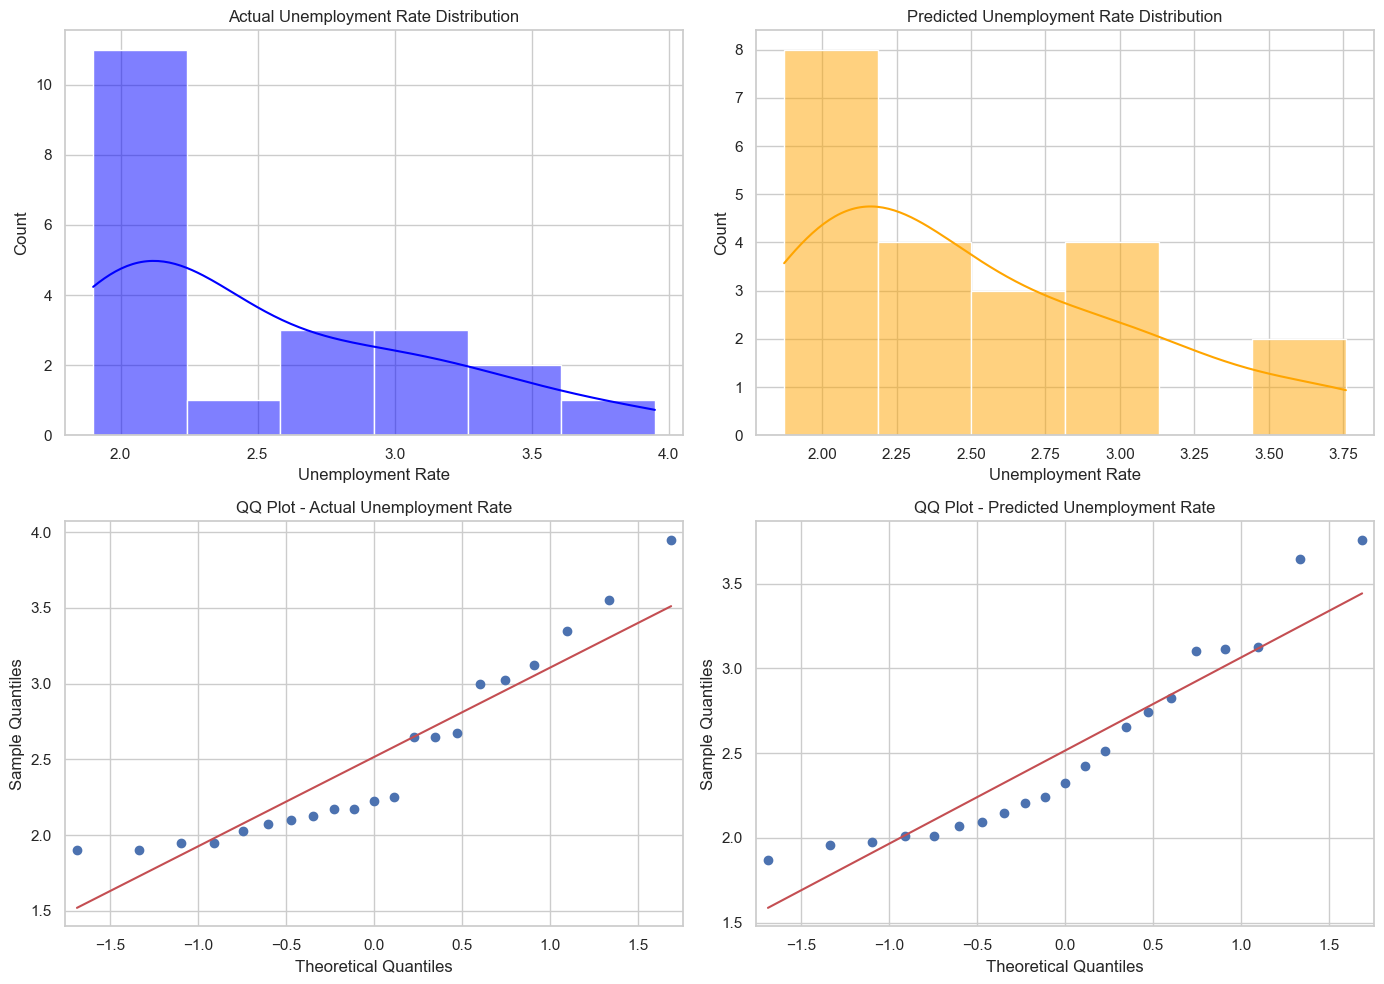

In [40]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Distribution plot with KDE for Actual Unemployment Rate
sns.histplot(actual_vs_predict_unemp_rate['Unemployment_Rate'], kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Actual Unemployment Rate Distribution')
axes[0, 0].set_xlabel('Unemployment Rate')

# Distribution plot with KDE for Predicted Unemployment Rate
sns.histplot(actual_vs_predict_unemp_rate['Predicted_Unemployment_Rate'], kde=True, ax=axes[0, 1], color='orange')
axes[0, 1].set_title('Predicted Unemployment Rate Distribution')
axes[0, 1].set_xlabel('Unemployment Rate')

# QQ plot for Actual Unemployment Rate
qqplot(actual_vs_predict_unemp_rate['Unemployment_Rate'], line='s', ax=axes[1, 0])
axes[1, 0].set_title('QQ Plot - Actual Unemployment Rate')

# QQ plot for Predicted Unemployment Rate
qqplot(actual_vs_predict_unemp_rate['Predicted_Unemployment_Rate'], line='s', ax=axes[1, 1])
axes[1, 1].set_title('QQ Plot - Predicted Unemployment Rate')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

<h4><u>Observation</u></h4>
<u>Distribution Plot</u>

Both the <b>predicted and actual unemployment rate</b> distribution graphs are <b>very right-skewed</b>

with the <b>most common unemployment rate of 2% </b>
<hr>
<hr>
<u>QQPlot</u>

<b>Linearity:</b>

This is near to the <b>Ideal Case:</b> In an ideal QQ plot, the points lie approximately on a straight line.

<hr>
<b>Distribution:</b>

<b>Straight Line:</b> The points do not fall along the line which means not normal distribution which matches the analysis of the distribution plot

<b>C-shaped Curve:</b> 

<ul><li>The tails of the distribution are lighter or thinner than the tails of a normal distribution.</li>
<li>This indicates that extreme values occur less frequently than expected under normality.</li>
</ul>
<hr>
<b>Outliers:</b>

<b>Outliers Off the Line:</b> Points departing significantly from the line may indicate outliers or extreme values in the dataset 

<b>which are points where theortical quantiles > 1</b>

<b>Analysis:</b> The outliers are explained in my merged_df anomalies explained part
<hr>
<b>Tails and Skewness:</b>

<b>Curvature in Tails:</b> Curvature in the tails may suggest that the tails of the distribution differ from the normal distribution.

<b>Skewness:</b> If the points deviate upward or downward systematically, it indicates skewness.

<b>Deviation from the Line:</b>

<b>Trend in Deviation:</b> Looks like the points sort of look like a quadratic expression and the deviations are more extreme when theortical quantiles > 1

<b>Analysis:</b> It is rare to have employment rate deviate by much unless there is an apocolytical esque situation that has happened
<hr><hr>

<h3>Residual Plot</h3>
<hr>

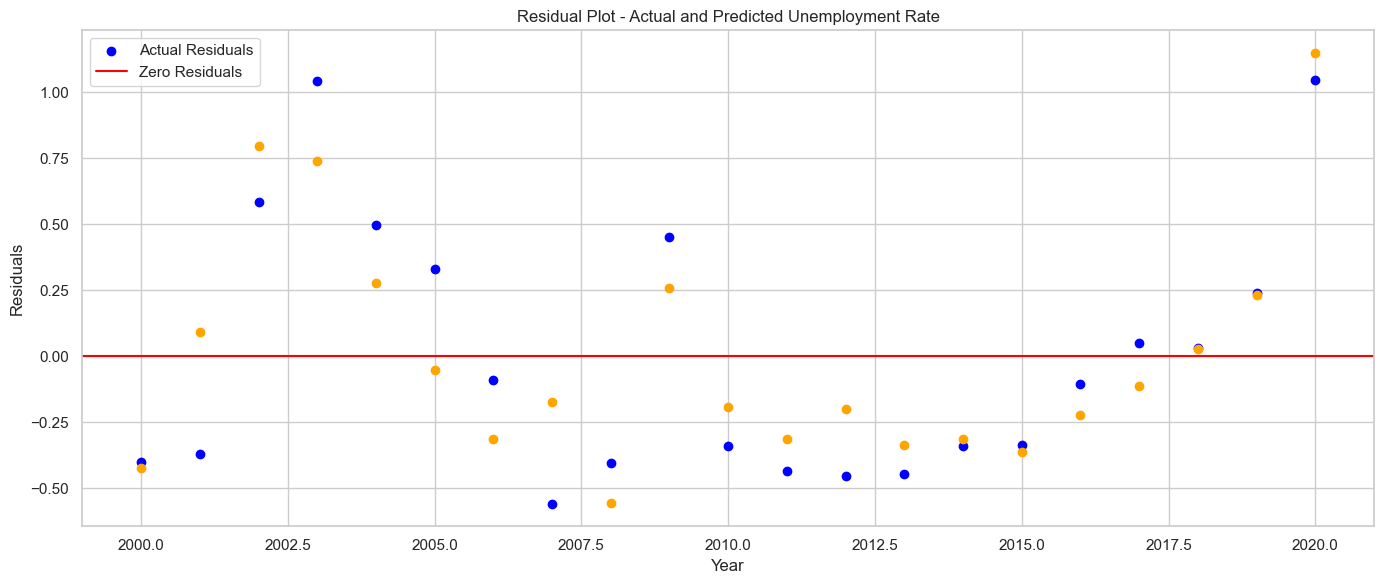

In [41]:
# Calculate residuals
actual_residuals = actual_vs_predict_unemp_rate['Unemployment_Rate'] - actual_line(actual_vs_predict_unemp_rate['Year'])
predicted_residuals = actual_vs_predict_unemp_rate['Predicted_Unemployment_Rate'] - predicted_line(actual_vs_predict_unemp_rate['Year'])

# Set up the 1x1 subplot
fig, axes = plt.subplots(1, 1, figsize=(14, 6))

# Residual plot for Actual Unemployment Rates
axes.scatter(actual_vs_predict_unemp_rate['Year'], actual_residuals, label='Actual Residuals', color='blue')
axes.axhline(y=0, color='red', linestyle='-', label='Zero Residuals')
axes.set_xlabel('Year')
axes.set_ylabel('Residuals')
axes.set_title('Residual Plot - Actual and Predicted Unemployment Rate')
axes.legend()

# Residual plot for Predicted Unemployment Rates
axes.scatter(actual_vs_predict_unemp_rate['Year'], predicted_residuals, label='Predicted Residuals', color='orange')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()



<h4>Concluding for Residual Plot</h4>
<hr>


<b>Since most of the residuals are concentrated between 1 and -1</b>, 

it generally indicates that the <b>model's predictions are close to the observed values</b>, and the residuals are <b>relatively small in magnitude.</b>

In other words, <b>the model is doing a good job of explaining the variability in the data.</b>


<u>Here are some <b>specific interpretations:</b></u>

<b>Good Fit: </b>

Residuals centered around zero (or between 1 and -1 in your case) suggest that, on average, <b>the model's predictions are close to the actual values</b>. This is a <b>positive sign, indicating a good fit between the model and the data.</b>

<b>Consistent Performance: </b>

My model produces <b>a narrow spread of residuals</b> indicates that the <b>model performs consistently across different levels of the independent variable</b> and which brings me to the next point...

<b>Homoscedasticity:</b> 

The fact that most residuals are <b>within a narrow range suggests homoscedasticity,</b> meaning that the <b>variance of the residuals is relatively constant</b> across the range of the <b>independent variables.</b>

<b>Small Errors: </b>

Residuals between 1 and -1 imply that the model tends to <b>make small errors</b> in its predictions. This could be considered a <b>desirable outcome</b>, as it suggests that the model is <b>capturing much of the underlying pattern in the data.</b>


<b>All in all my prediction model is a great success in my opinion as it is able to capture not only small flucuations for year to year basis,

BUT ALSO, it was able to capture the anomalies which are spikes in Unemployment Rate very well </b>

<hr> 

<b><h3>Predicting Unemployment Rate in 2021</h3></b>
<h5>Creating Scenarios to see how fluctuations in the independant variables (Interest_Rate,	CO2_Emissions_per_Capita, GDP_per_Capita, Education_Spending_Share_of_GDP, Ratio_of_female_to_male_labor_force_participation, Year) affect predicted Unemployment Rates</h5>

<hr>
Side Note: Data from 2021 is just <b>test data</b> to ensure model is <b>really able to predict Unemployment Rate accurately</b>

When testing all other independant variables would stay the same

<b><h3>Scenario 1: Trial for Transformation in Education Strategies</h3></b>
<hr></hr>
The Parilament has approved the Budget Plan of 2021 where the Ministry of Education starts heavily investing into the younger generations by increasing Education Spending Share of GDP to a staggering 10%


In [65]:
prediction_data = pd.DataFrame({
    'Year': merged_df['Year'],
    'GDP_per_Capita': merged_df['GDP_per_Capita'], 
    'Education_Spending_Share_of_GDP': merged_df['Education_Spending_Share_of_GDP'],
    'Ratio_of_female_to_male_labor_force_participation': merged_df['Ratio_of_female_to_male_labor_force_participation']
})
prediction_data1=prediction_data.copy()

new_row1 = {
    'Year': 2021,
    'GDP_per_Capita': 94505.630,
    'Education_Spending_Share_of_GDP': 10,
    'Ratio_of_female_to_male_labor_force_participation': 77.382774
}

# Use loc to add the new row to the DataFrame
prediction_data1.loc[len(prediction_data)] = new_row1


# Use the model to predict values
predicted_unemployment1 = modelOLS.predict(prediction_data1)

# Create a DataFrame for the predicted unemployment rates
predicted_unemployment_df1 = pd.DataFrame({
    'Year': prediction_data1['Year'],
    'Predicted_Unemployment_Rate': predicted_unemployment1
})

# Verify the new DataFrame
print(predicted_unemployment_df1)

    Year  Predicted_Unemployment_Rate
0   2000                     2.652427
1   2001                     3.113193
2   2002                     3.758944
3   2003                     3.646497
4   2004                     3.128693
5   2005                     2.743701
6   2006                     2.424542
7   2007                     2.510656
8   2008                     2.072277
9   2009                     2.828330
10  2010                     2.323800
11  2011                     2.147427
12  2012                     2.204094
13  2013                     2.011269
14  2014                     1.977206
15  2015                     1.872642
16  2016                     1.957318
17  2017                     2.011116
18  2018                     2.095992
19  2019                     2.241140
20  2020                     3.103736
21  2021                     9.813846


<u><h4><b>Conclusion:</b></h4></u>

In the real world, the spike in the unemployment rate of 9.81% can be attributable to 

the fact that 10% of Singapore's GDP in Scenario 1 was spent on education instead of other critical areas, such as infrastructure or job creation initiatives.

<b><h3>Scenario 2: Singapore During the COVID-19 Pandemic</h3></b>
<hr></hr>
Due to slow down in production and efficency of Singapore's economy and borders being closed, no trades were done as a result

Singapore GDP per Capita decreased from $94,505 to around $50,000 nearly halving GDP per Capita...


In [69]:
prediction_data2=prediction_data.copy()

new_row2 = {
    'Year': 2021,
    'GDP_per_Capita': 50000,
    'Education_Spending_Share_of_GDP': 2.687450,
    'Ratio_of_female_to_male_labor_force_participation': 77.382774
}

# Use loc to add the new row to the DataFrame
prediction_data2.loc[len(prediction_data)] = new_row2


# Use the model to predict values
predicted_unemployment2 = modelOLS.predict(prediction_data2)

# Create a DataFrame for the predicted unemployment rates
predicted_unemployment_df2 = pd.DataFrame({
    'Year': prediction_data2['Year'],
    'Predicted_Unemployment_Rate': predicted_unemployment2
})

# Verify the new DataFrame
print(predicted_unemployment_df2)

    Year  Predicted_Unemployment_Rate
0   2000                     2.652427
1   2001                     3.113193
2   2002                     3.758944
3   2003                     3.646497
4   2004                     3.128693
5   2005                     2.743701
6   2006                     2.424542
7   2007                     2.510656
8   2008                     2.072277
9   2009                     2.828330
10  2010                     2.323800
11  2011                     2.147427
12  2012                     2.204094
13  2013                     2.011269
14  2014                     1.977206
15  2015                     1.872642
16  2016                     1.957318
17  2017                     2.011116
18  2018                     2.095992
19  2019                     2.241140
20  2020                     3.103736
21  2021                     6.028087


<u><h4><b>Conclusion:</b></h4></u>

In the real world, the real world if GDP per Capita nearly halves to $50,000, 

consumers (the general public) would more likely want to save more of what little money they earn instead of spending and helping small and large businesses function. 

Hence as businesses become less or not profitable, they would seek to cut workers to keep their profit margin, the spike in unemployment rate of 6.028087% is reasonable

<b><h3>Scenario 3: Singapore an Economic Super Successful Powerhouse</h3></b>
<hr></hr>
Due to increased production and efficency of Singapore's economy, 

Singapore GDP per Capita increase from $94,505 to around $200,000 nearly doubling GDP per Capita...

In [70]:
prediction_data3=prediction_data.copy()

new_row3 = {
    'Year': 2021,
    'GDP_per_Capita': 200000,
    'Education_Spending_Share_of_GDP': 2.687450,
    'Ratio_of_female_to_male_labor_force_participation': 77.382774
}

# Use loc to add the new row to the DataFrame
prediction_data3.loc[len(prediction_data)] = new_row3


# Use the model to predict values
predicted_unemployment3 = modelOLS.predict(prediction_data3)

# Create a DataFrame for the predicted unemployment rates
predicted_unemployment_df3 = pd.DataFrame({
    'Year': prediction_data3['Year'],
    'Predicted_Unemployment_Rate': predicted_unemployment3
})

# Verify the new DataFrame
print(predicted_unemployment_df3)

    Year  Predicted_Unemployment_Rate
0   2000                     2.652427
1   2001                     3.113193
2   2002                     3.758944
3   2003                     3.646497
4   2004                     3.128693
5   2005                     2.743701
6   2006                     2.424542
7   2007                     2.510656
8   2008                     2.072277
9   2009                     2.828330
10  2010                     2.323800
11  2011                     2.147427
12  2012                     2.204094
13  2013                     2.011269
14  2014                     1.977206
15  2015                     1.872642
16  2016                     1.957318
17  2017                     2.011116
18  2018                     2.095992
19  2019                     2.241140
20  2020                     3.103736
21  2021                    -2.879447


<u><h4><b>Conclusion:</b></h4></u>

In the real world if GDP per Capita doubles to $200,000, consumers (the general public) would more likely want to spend more as they are able to earn more 

Hence as more businesses become profitable, they would seek to hire workers to increase their profit margin, 

so the sharp decrease in unemployment rate of -2.879447% is reasonable

<b><h3>Scenario 4: Singapore strongly Embracing Gender Equality</h3></b>
<hr></hr>
Due to robust advocacy and progressive policies, Singapore has emerged as a global leader in gender equality, 

implementing measures in workplaces and education, fostering a diverse and inclusive society and 

as a result the ratio of female to male labor force participation is 100% which means for every men in the workplace, there is also a woman in the workplace in Singapre

In [72]:
prediction_data4=prediction_data.copy()

new_row4 = {
    'Year': 2021,
    'GDP_per_Capita': 94505.630,
    'Education_Spending_Share_of_GDP': 2.687450,
    'Ratio_of_female_to_male_labor_force_participation': 100
}

# Use loc to add the new row to the DataFrame
prediction_data4.loc[len(prediction_data)] = new_row4


# Use the model to predict values
predicted_unemployment4 = modelOLS.predict(prediction_data4)

# Create a DataFrame for the predicted unemployment rates
predicted_unemployment_df4 = pd.DataFrame({
    'Year': prediction_data4['Year'],
    'Predicted_Unemployment_Rate': predicted_unemployment4
})

# Verify the new DataFrame
print(predicted_unemployment_df4)

    Year  Predicted_Unemployment_Rate
0   2000                     2.652427
1   2001                     3.113193
2   2002                     3.758944
3   2003                     3.646497
4   2004                     3.128693
5   2005                     2.743701
6   2006                     2.424542
7   2007                     2.510656
8   2008                     2.072277
9   2009                     2.828330
10  2010                     2.323800
11  2011                     2.147427
12  2012                     2.204094
13  2013                     2.011269
14  2014                     1.977206
15  2015                     1.872642
16  2016                     1.957318
17  2017                     2.011116
18  2018                     2.095992
19  2019                     2.241140
20  2020                     3.103736
21  2021                    -1.192082


<u><h4><b>Conclusion:</b></h4></u>

In the real world, if there is gender equality, there would be equal opportunity for all and without gender playing a role in employment process, 

which would make the workplace a more inclusive environment. Due to influx of workers, businesses would tend to hire more often.

Hence there would be a steep decrease in unemployment rate from 3.103736% in 2020 to -1.192082% in 2021.

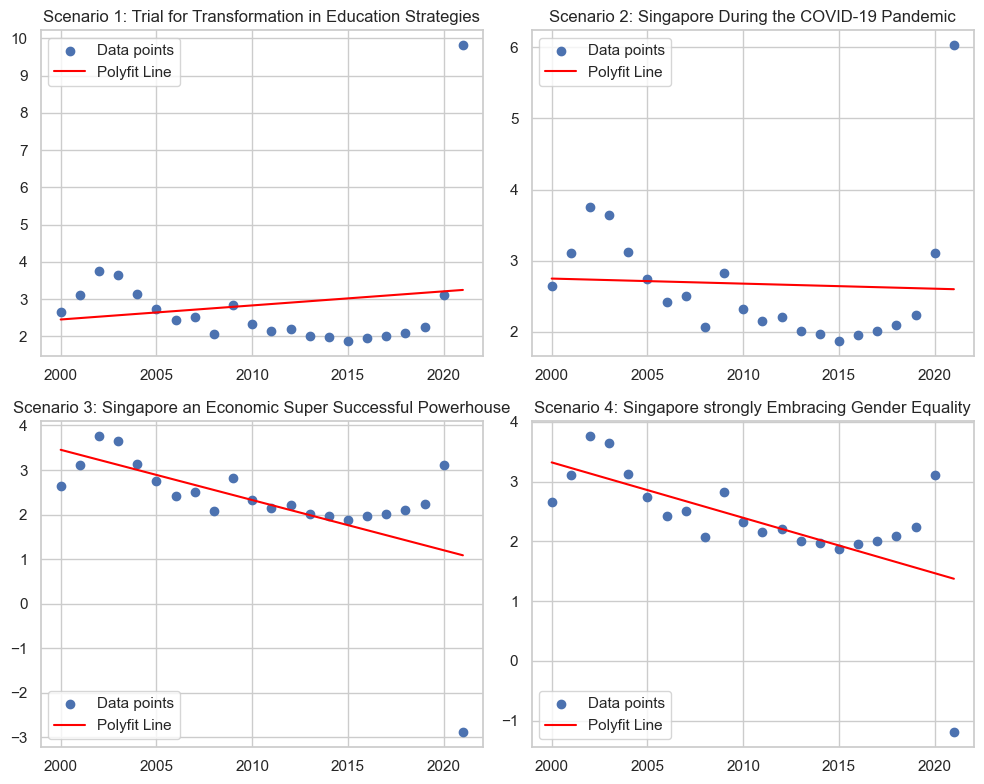

In [76]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming predicted_unemployment_df1 to predicted_unemployment_df4 are your DataFrames

# Subplot of all the 4 scatterplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Function to plot scatter and polyfit line
def plot_scatter_with_polyfit(df, ax, title):
    x = df['Year']
    y = df['Predicted_Unemployment_Rate']
    
    # Scatter plot
    ax.scatter(x, y, label='Data points')
    
    # Polyfit line
    coeffs = np.polyfit(x, y, 1)
    polyfit_line = np.poly1d(coeffs)
    
    # Plot the polyfit line
    ax.plot(x, polyfit_line(x), color='red', label='Polyfit Line')
    
    ax.set_title(title)
    ax.legend()

# Scatter plot with polyfit for predicted_unemployment_df1
plot_scatter_with_polyfit(predicted_unemployment_df1, axes[0, 0], 'Scenario 1: Trial for Transformation in Education Strategies')

# Scatter plot with polyfit for predicted_unemployment_df2
plot_scatter_with_polyfit(predicted_unemployment_df2, axes[0, 1], 'Scenario 2: Singapore During the COVID-19 Pandemic')

# Scatter plot with polyfit for predicted_unemployment_df3
plot_scatter_with_polyfit(predicted_unemployment_df3, axes[1, 0], 'Scenario 3: Singapore an Economic Super Successful Powerhouse')

# Scatter plot with polyfit for predicted_unemployment_df4
plot_scatter_with_polyfit(predicted_unemployment_df4, axes[1, 1], 'Scenario 4: Singapore strongly Embracing Gender Equality')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


<u><h3>Last General Conclusion:</h3></u>
<h4>
<ul>
<li>
Singapore's 2-3% of GDP spent on Education is a sufficent and well-considered amount by the government and more GDP should not be directed to Education to prevent high unemployment rates from happening.
</li>
<li> The COVID-19 esque Pandemic situations only happens once in a blue moon, however it would serevely impact the unemployment rate of the people of Singapore if Singapore is not well prepared
</li>
<li> It would be a dream scenario if singapore GDP per Capita is $200,000, but it is possible that unemployment rate goes negative as businesses want to hire more people to increase their productivity
</li>
<li>
In the best case scenario where for every man in the workplace there is a woman, due to the increase in supply pool of human resources, it would theoritically cost less to hire so businesses would likely hire more and unemployment rate would decrease.
</li>
</h4>

<h2><i> ~ The End ~</i></h2>